In [1]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Read the data.

In [2]:
dfr = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
dfr.head().to_csv('rose_head.csv')
dfr.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [3]:
dfs = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')
dfs.head().to_csv('spark_head.csv')
dfs.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


## Check for Missing Values

In [6]:
dfs.isna().sum()

Sparkling    0
dtype: int64

In [7]:
dfr.isna().sum()

Rose    2
dtype: int64

## Fill Missing Values by Interpolation

In [8]:
dfr = dfr.interpolate()

In [9]:
dfr.isna().sum()

Rose    0
dtype: int64

## Plot the Time Series

In [10]:
rcParams['figure.figsize'] = 16,9

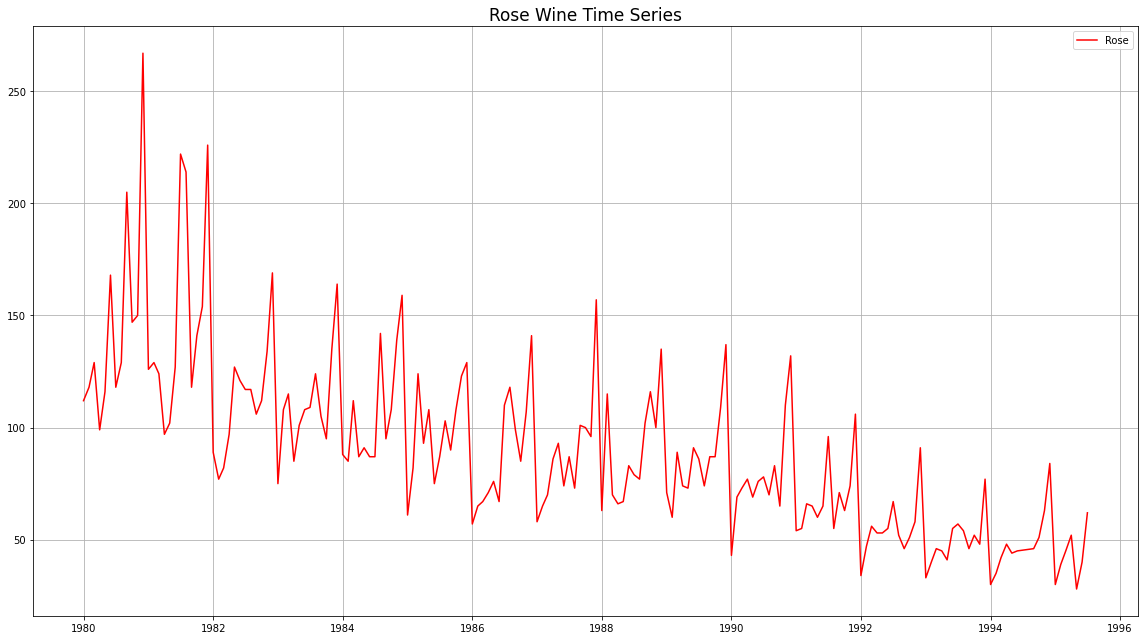

In [11]:
# ROSE TIME SERIES

plt.plot(dfr, color='red');
plt.title('Rose Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Rose'], loc='best');
plt.tight_layout()
plt.savefig('rose_ts.jpg', bbox_inches='tight');


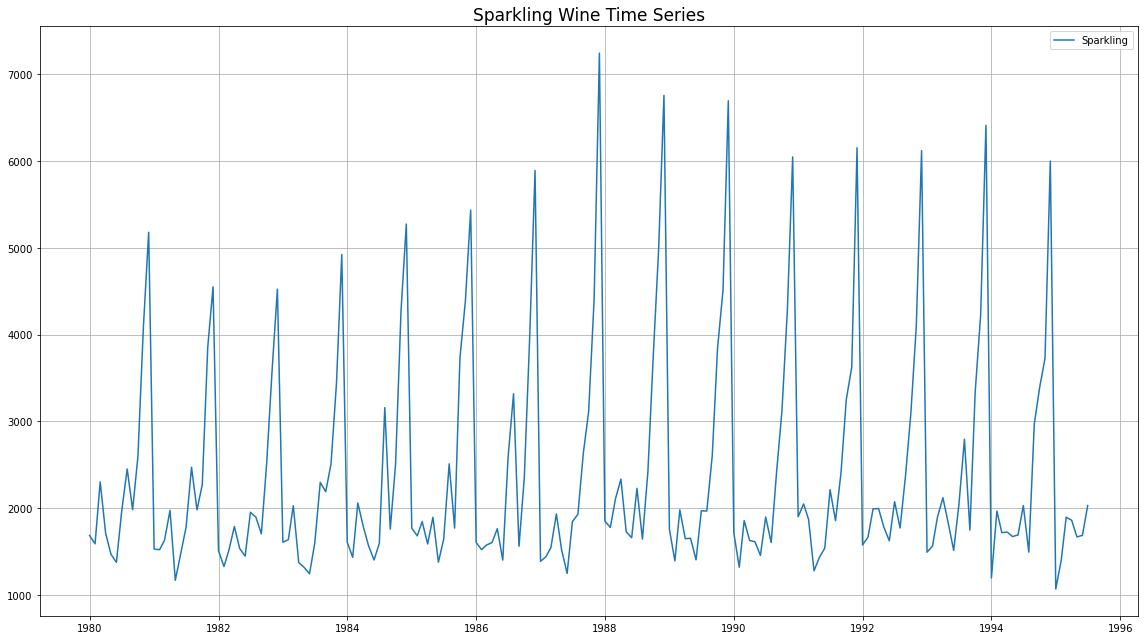

In [12]:
# SPARKLING TIME SERIES

plt.plot(dfs);
plt.title('Sparkling Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Sparkling']);
plt.tight_layout()
plt.savefig('spark_ts.jpg', bbox_inches='tight');



## Check the basic measures of descriptive statistics of the Time Series

In [13]:

round(dfr.describe().T,3).to_csv('rose_describe.csv')
round(dfr.describe().T,3)

count    mean     std   min   25%   50%    75%    max
Rose  187.0  89.914  39.238  28.0  62.5  85.0  111.0  267.0

In [14]:

round(dfs.describe().T,3).to_csv('spark_describe.csv')
round(dfs.describe().T,3)

count      mean       std     min     25%     50%     75%     max
Sparkling  187.0  2402.417  1295.112  1070.0  1605.0  1874.0  2549.0  7242.0

## Plot Box-plot Monthwise

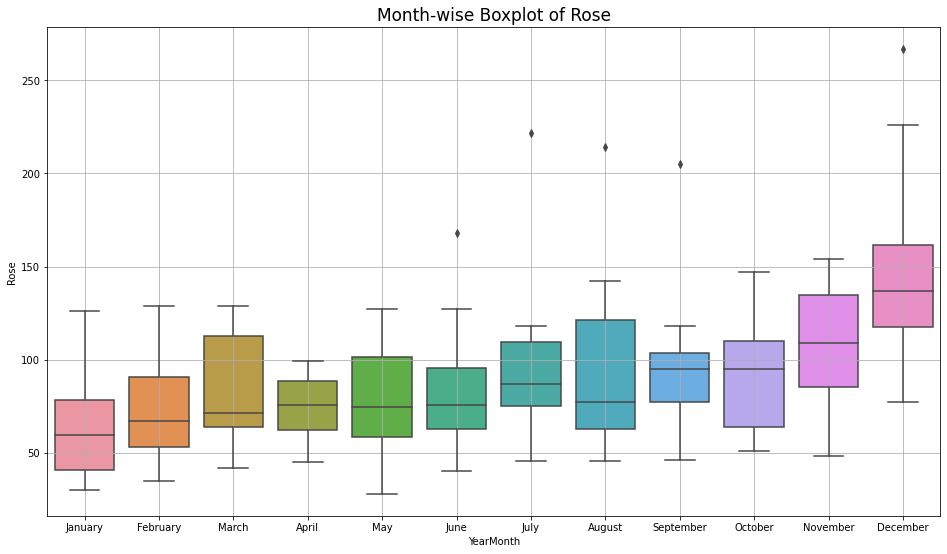

In [15]:
sns.boxplot(x = dfr.index.month_name(), y = dfr['Rose']);
plt.grid();
plt.title('Month-wise Boxplot of Rose', fontsize=17);
plt.savefig('rose_monthwise_box.jpg', bbox_inches='tight');

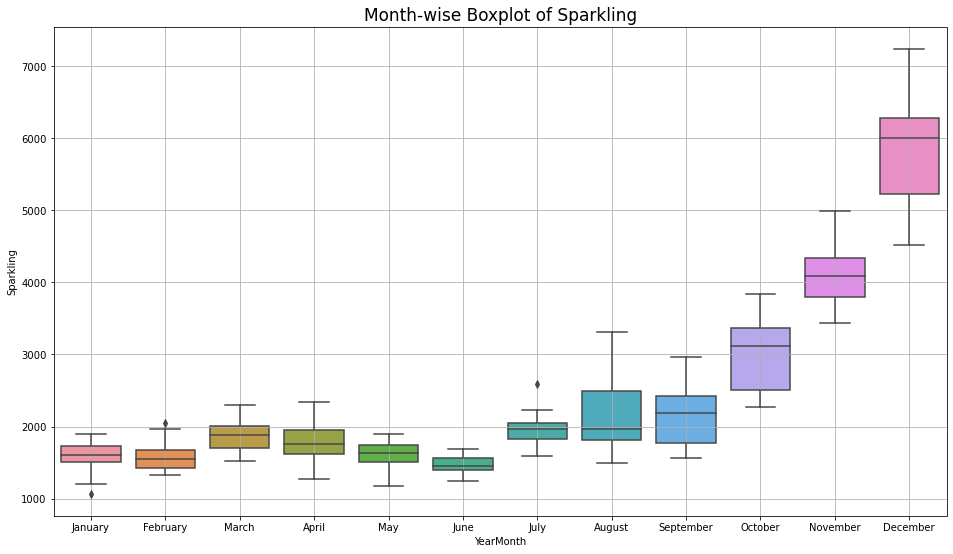

In [16]:
sns.boxplot(x = dfs.index.month_name(), y = dfs['Sparkling']);
plt.grid();
plt.title('Month-wise Boxplot of Sparkling', fontsize=17);
plt.savefig('spark_monthwise_box.jpg', bbox_inches='tight');

## Decompose the Time Series and plot the different components.

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition of Rose

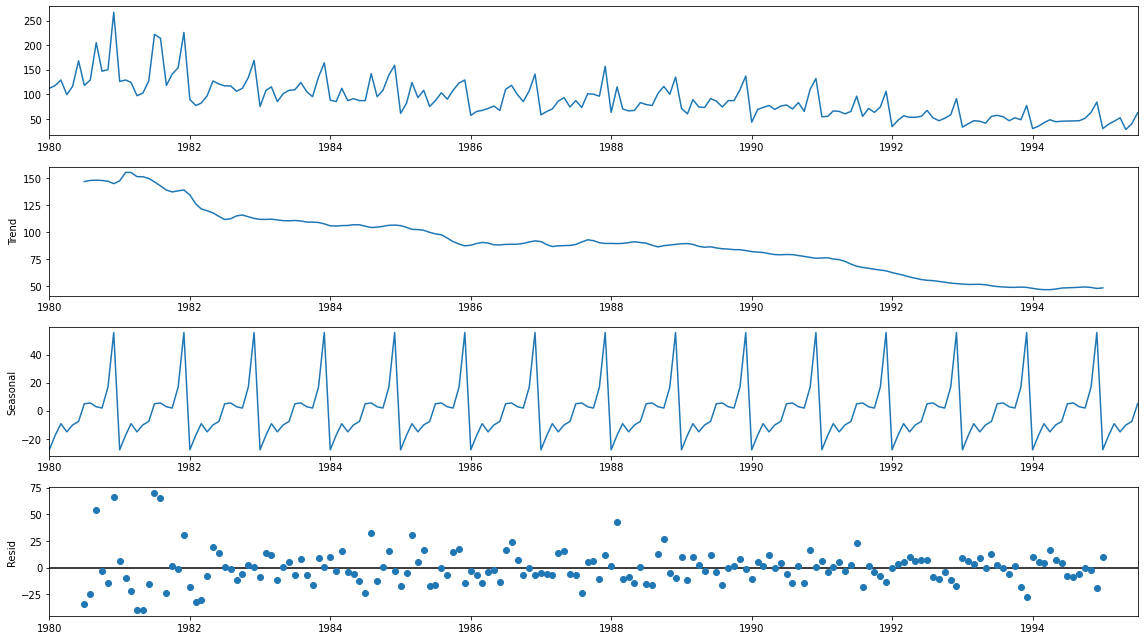

In [18]:
decompositionr = seasonal_decompose(dfr,model='additive')

decompositionr.plot()
plt.savefig('decomposer.jpg', bbox_inches='tight');


In [19]:
trend = decompositionr.trend
seasonality = decompositionr.seasonal
residual = decompositionr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend.csv')
seasonality.head(12).to_csv('rose_season.csv')
residual.head(12).to_csv('rose_resid.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

<AxesSubplot:xlabel='YearMonth'>

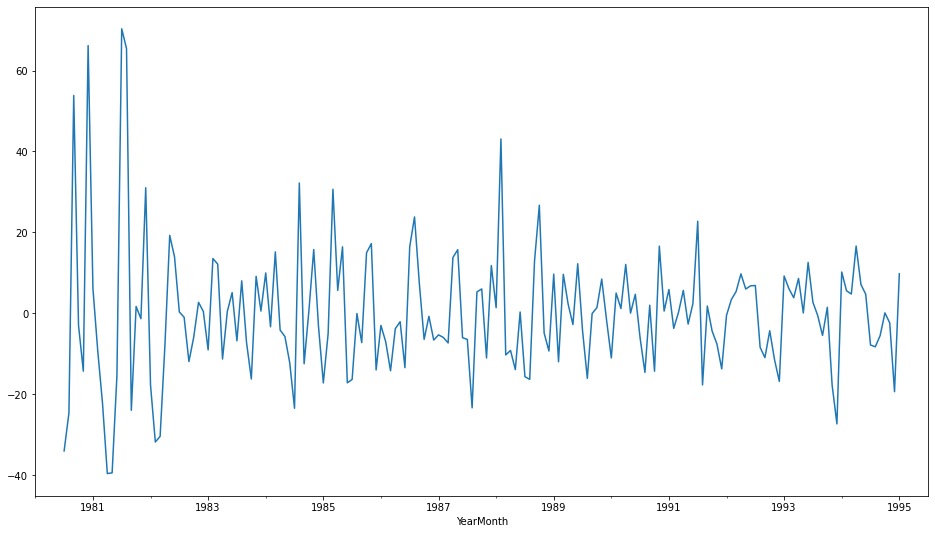

In [20]:
residual.plot()

### Additive Decomposition of Sparkling

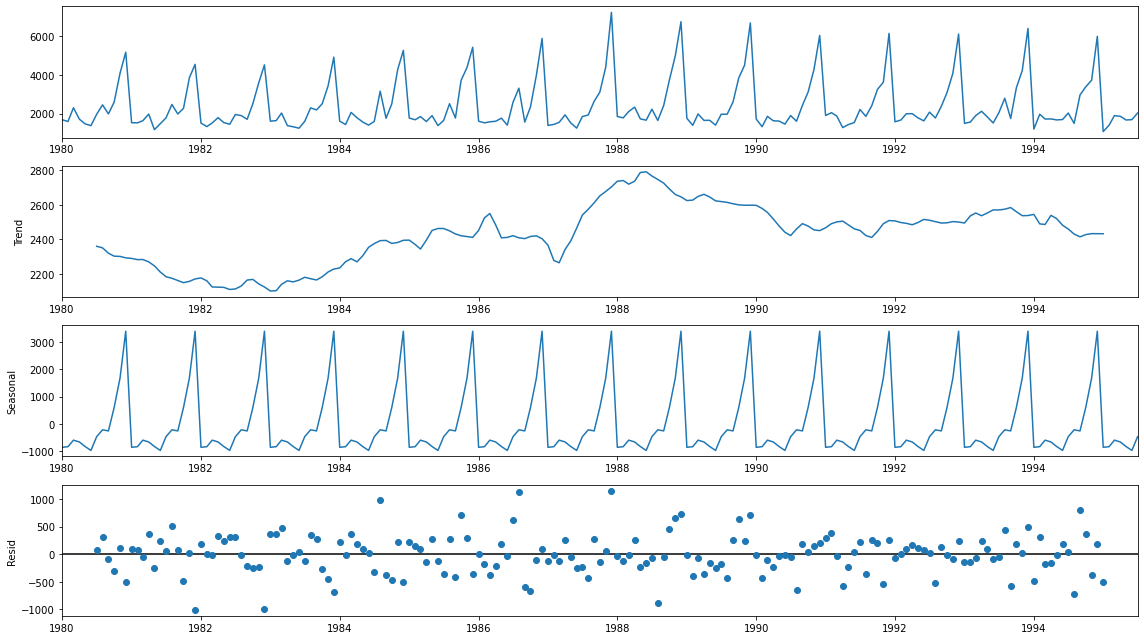

In [21]:
decompositions = seasonal_decompose(dfs,model='additive')
decompositions.plot();
plt.savefig('decomposes.jpg', bbox_inches='tight');



In [22]:
trend = decompositions.trend
seasonality = decompositions.seasonal
residual = decompositions.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend.csv')
seasonality.head(12).to_csv('spark_season.csv')
residual.head(12).to_csv('spark_resid.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [23]:
cvsa = residual.std()/residual.mean()
cvsa

-296.08335294142995

### Multiplicative Decomposition of Rose

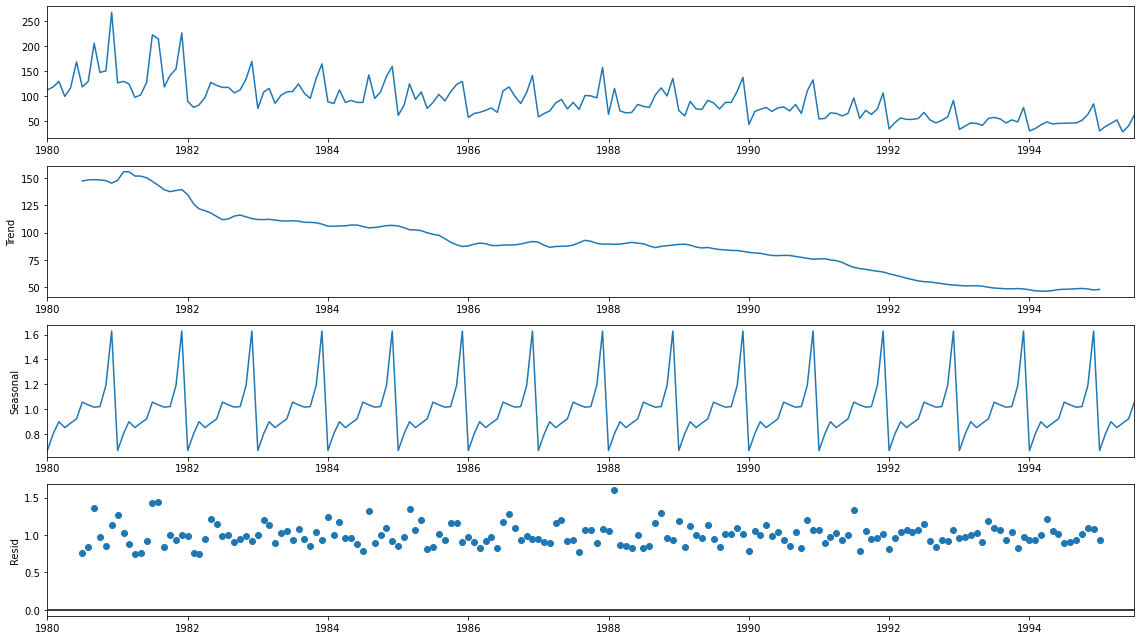

In [24]:
decompositionmr = seasonal_decompose(dfr,model='multiplicative')
decompositionmr.plot();
plt.savefig('decomposemr.jpg', bbox_inches='tight');

In [25]:
trend = decompositionmr.trend
seasonality = decompositionmr.seasonal
residual = decompositionmr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend_m.csv')
seasonality.head(12).to_csv('rose_season_m.csv')
residual.head(12).to_csv('rose_resid_m.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

<AxesSubplot:xlabel='YearMonth'>

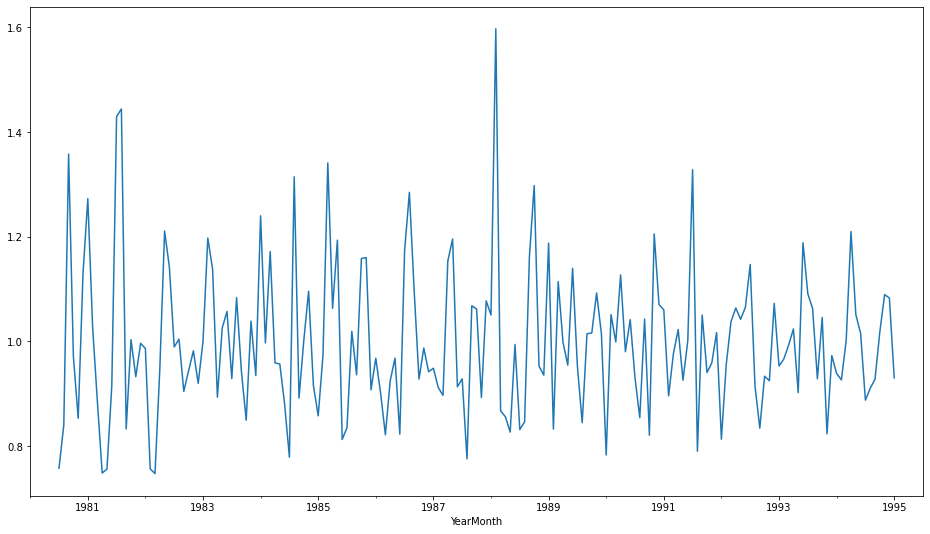

In [26]:
residual.plot()

For the multiplicative series, we see that a lot of residuals are located around 1.

### Multiplicative Decomposition of Sparkling

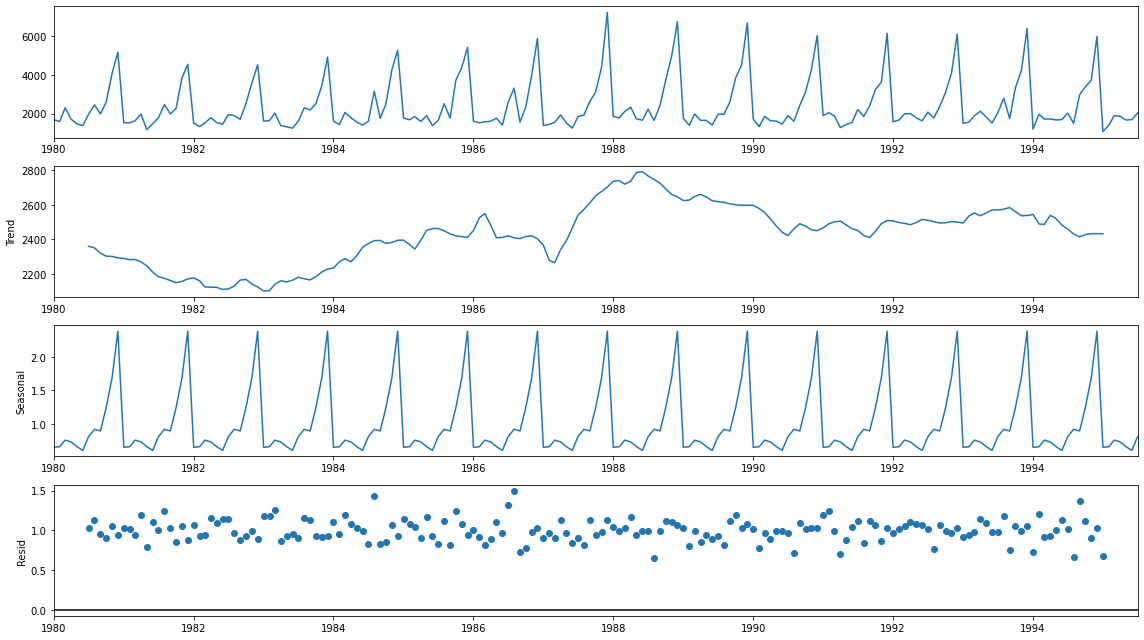

In [27]:
decompositionms = seasonal_decompose(dfs,model='multiplicative')
decompositionms.plot();
plt.savefig('decomposems.jpg', bbox_inches='tight');

In [28]:
trend = decompositionms.trend
seasonality = decompositionms.seasonal
residual = decompositionms.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend_m.csv')
seasonality.head(12).to_csv('spark_season_m.csv')
residual.head(12).to_csv('spark_resid_m.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [29]:
cvsm = residual.std()/residual.mean()
cvsm

0.13886244212828963

## Split the data into train and test and plot the training and test data. [Test Data should start from 1991]

In [30]:
# ROSE DATA SPLIT

rtrain = dfr[dfr.index<'1991'] 
rtest = dfr[dfr.index>='1991']

In [31]:
# SPARKLING DATA SPLIT

strain = dfs[dfs.index<'1991'] 
stest = dfs[dfs.index>='1991']

In [32]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [33]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [34]:
from IPython.display import display

In [35]:
# ROSE DATA TRAIN AND TEST

print('First few rows of Rose Training Data')
display(rtrain.head())
print('Last few rows of Rose Training Data')
display(rtrain.tail())
print('First few rows of Rose Test Data')
display(rtest.head())
print('Last few rows of Rose Test Data')
display(rtest.tail())

rtrain.to_csv('rose_train.csv')
rtest.to_csv('rose_test.csv')

First few rows of Rose Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Rose Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Rose Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Rose Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [36]:
# SPARKLING DATA TRAIN AND TEST

print('First few rows of Sparkling Training Data')
display(strain.head())
print('Last few rows of Sparkling Training Data')
display(strain.tail())
print('First few rows of Sparkling Test Data')
display(stest.head())
print('Last few rows of Sparkling Test Data')
display(stest.tail())

strain.to_csv('spark_train.csv')
stest.to_csv('spark_test.csv')

First few rows of Sparkling Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Sparkling Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Sparkling Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Sparkling Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

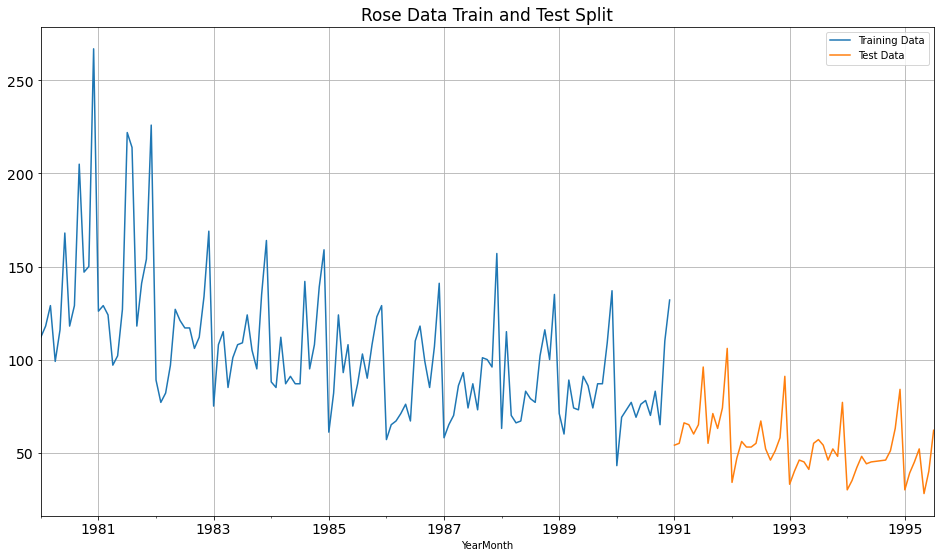

In [37]:
# ROSE DATA TRAIN TEST SPLIT TIME SERIES

rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.savefig('rose_split_ts.jpg', bbox_inches='tight')
plt.show();

<AxesSubplot:xlabel='YearMonth'>

<AxesSubplot:xlabel='YearMonth'>

Text(0.5, 1.0, 'Sparkling Data Train and Test Split')

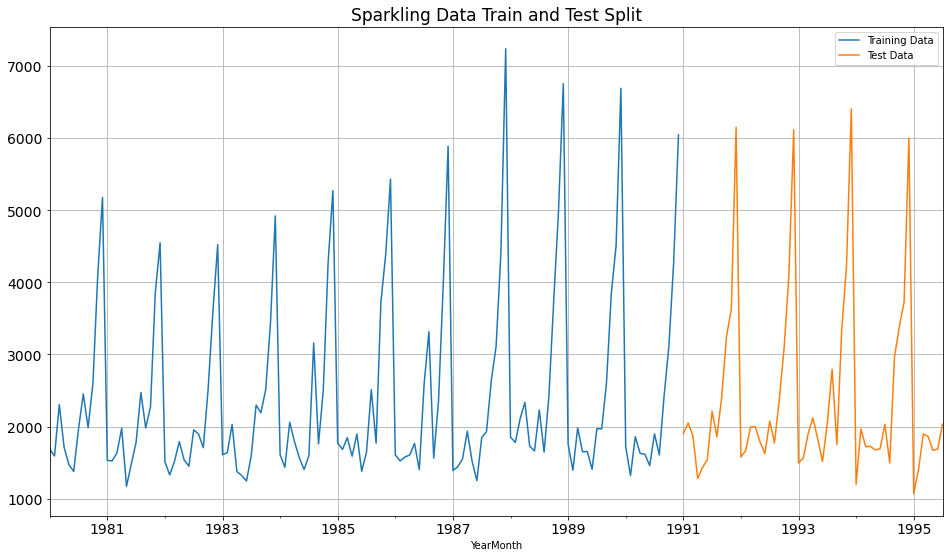

In [38]:
# SPARKLING DATA TRAIN TEST SPLIT TIME SERIES

strain['Sparkling'].plot(fontsize=14)
stest['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.savefig('spark_split_ts.jpg', bbox_inches='tight')
plt.show()

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression on Rose

#### For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [39]:
rtrain.shape
rtest.shape

(132, 1)

(55, 1)

In [40]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [41]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()

In [42]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

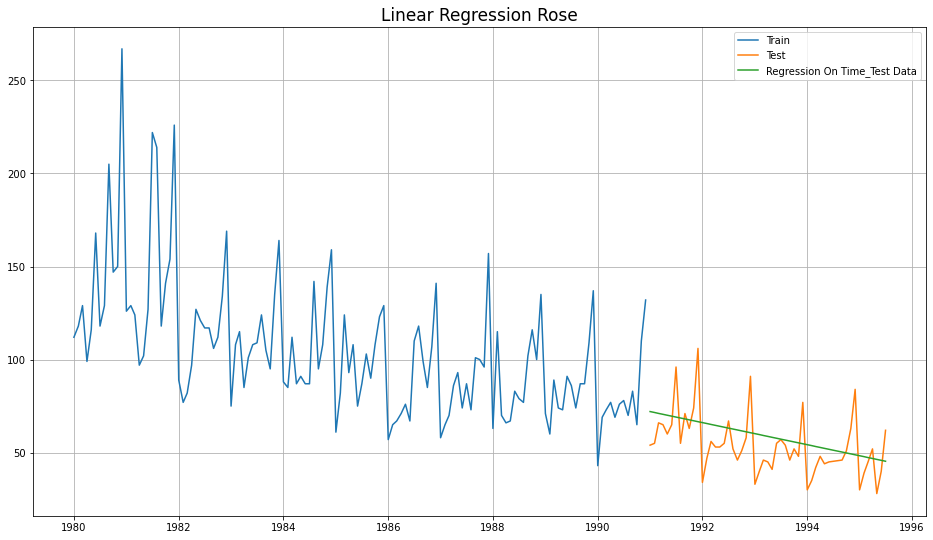

In [46]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();
plt.savefig('lr_rose.jpg', bbox_inches='tight');

#### Defining the functions for calculating the accuracy metrics.

In [47]:
from sklearn import metrics

### Model Evaluation

In [48]:
rmse_model11_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model11_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [49]:
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse_model11_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE Rose
RegressionOnTime       15.268955

## Model 1: Linear Regression Sparkling

In [50]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [51]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [52]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

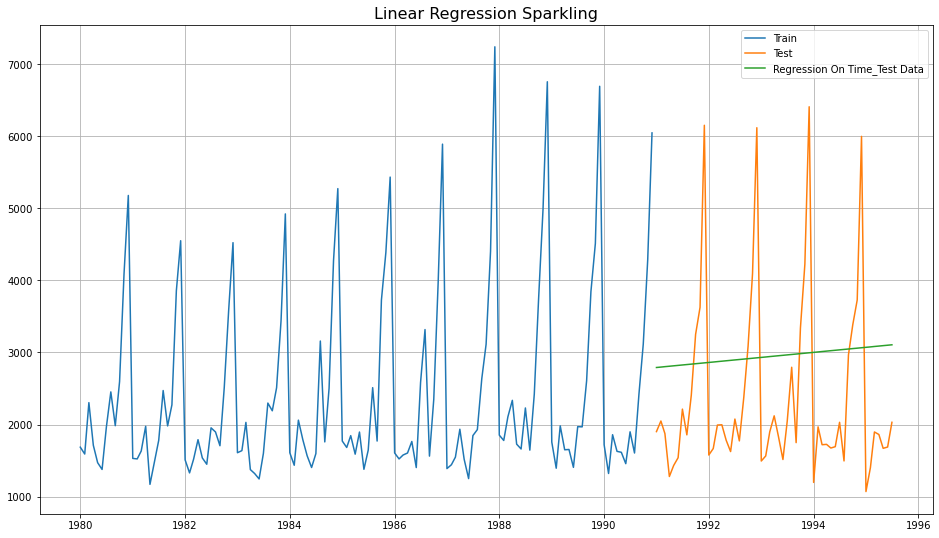

In [56]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();
plt.savefig('spark_lr.jpg', bbox_inches='tight');

#### Defining the functions for calculating the accuracy metrics.

In [57]:
from sklearn import metrics

### Model Evaluation

In [58]:
rmse_model12_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [59]:
resultsDf_12 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model12_test]},index=['RegressionOnTime'])

resultsDf = pd.merge(resultsDf, resultsDf_12, left_index=True, right_index=True)
resultsDf.to_csv('results_lr.csv')
resultsDf


Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

## Model 2: Naive Approach Rose : $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [60]:
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()

In [61]:
rtrain.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [62]:
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

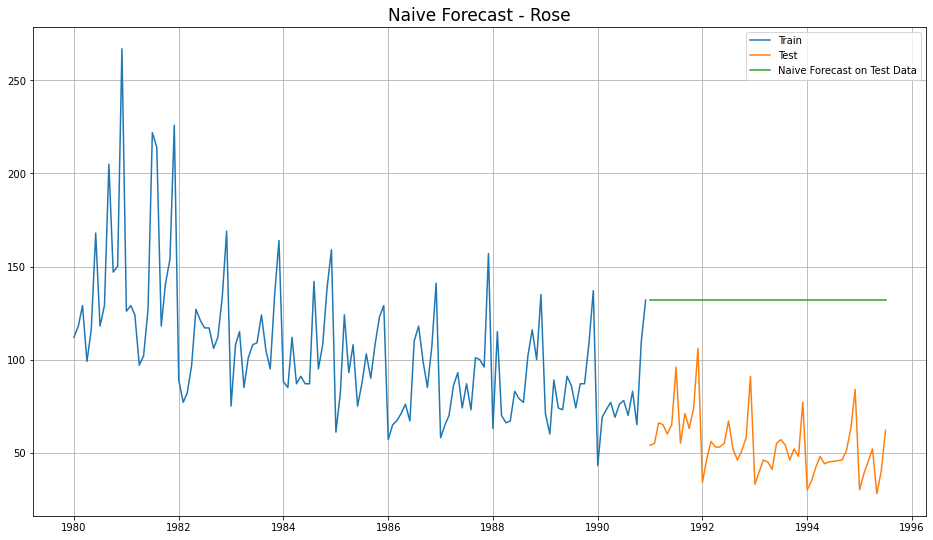

In [63]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_naive.jpg', bbox_inches='tight');

### Model Evaluation

In [64]:
rmse_model21_test = metrics.mean_squared_error(rtest['Rose'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model21_test))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [65]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [66]:
resultsDf_21 = pd.DataFrame({'Test RMSE Rose': [rmse_model21_test]},index=['NaiveModel'])

# resultsDf = pd.concat([resultsDf, resultsDf_3], ignore_index=True)
# resultsDf

# resultsDf_3 = pd.DataFrame({'Test RMSE Rose': [rmse_model2_test]},index=['NaiveModel'])

# resultsDf.join(resultsDf_3, how='inner')

# resultsDf = pd.merge(resultsDf, resultsDf_21, left_index=True, right_index=True)
# resultsDf



## Model 2: Naive Approach Sparkling : $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [67]:
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()

In [68]:
strain.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [69]:
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

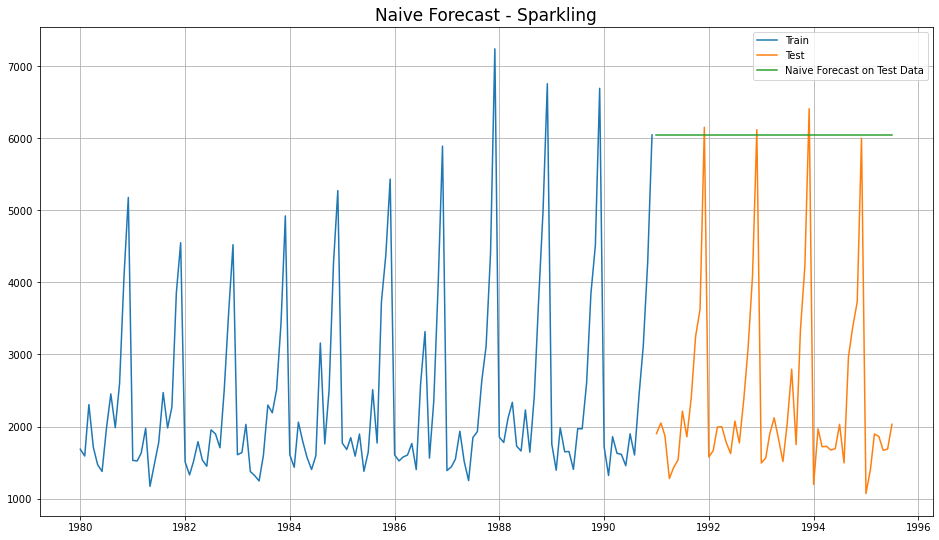

In [70]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_naive.jpg', bbox_inches='tight');

### Model Evaluation

In [71]:
rmse_model22_test = metrics.mean_squared_error(stest['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model22_test))

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


In [72]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [73]:
resultsDf_21

Test RMSE Rose
NaiveModel       79.718773

In [74]:
resultsDf_22 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model22_test]},index=['NaiveModel'])

# resultsDf = pd.concat([resultsDf, resultsDf_3], ignore_index=True)
# resultsDf

# resultsDf_3 = pd.DataFrame({'Test RMSE Rose': [rmse_model2_test]},index=['NaiveModel'])

# resultsDf.join(resultsDf_3, how='inner')

resultsDf1 = resultsDf_21.join(resultsDf_22, how='outer')
resultsDf1



Test RMSE Rose  Test RMSE Sparkling
NaiveModel       79.718773          3864.279352

In [75]:
resultsDf3 = pd.concat([resultsDf, resultsDf1], axis=0)
resultsDf3

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

In [76]:
resultsDf = resultsDf3.copy()
resultsDf.to_csv('results_nb.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

## Model 3: Simple Average Rose

#### For this particular simple average method, we will forecast by using the average of the training values.

In [77]:
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()

In [78]:
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

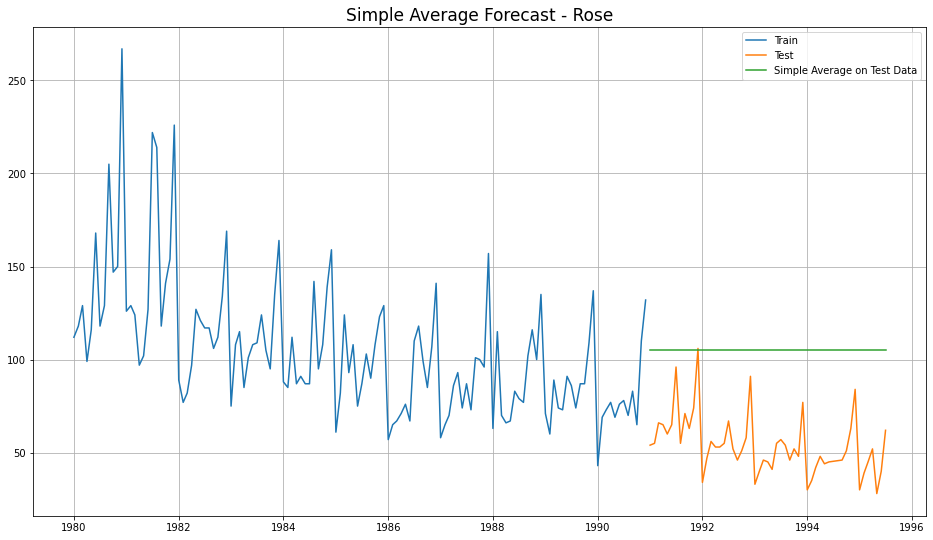

In [79]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_simpleaverage.jpg', bbox_inches='tight');

### Model Evaluation

In [80]:
rmse_model31_test = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model31_test))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [81]:
resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_model31_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_31
# resultsDf = pd.concat([resultsDf, resultsDf_3])
# resultsDf

Test RMSE Rose
SimpleAverageModel        53.46057

## Model 3: Simple Average Sparkling

#### For this particular simple average method, we will forecast by using the average of the training values.

In [82]:
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

In [83]:
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

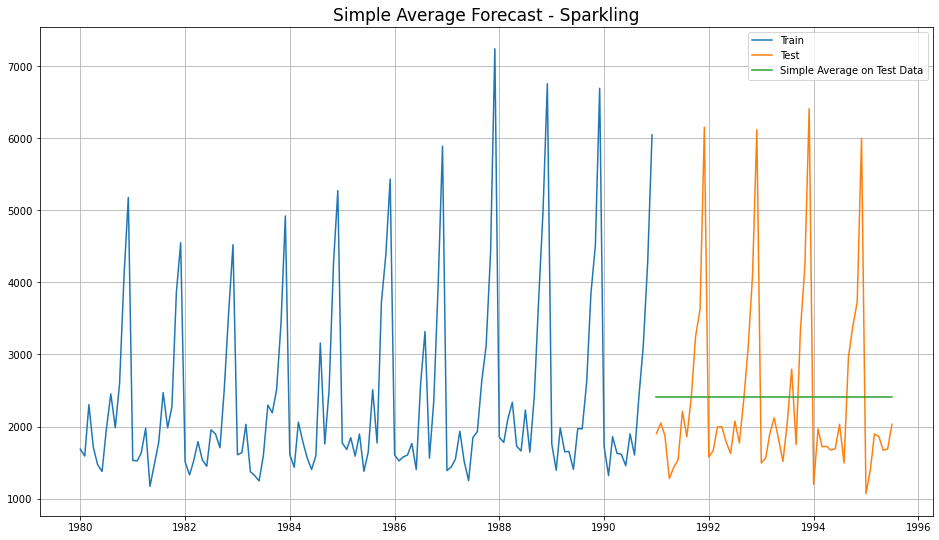

In [84]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_simpleaverage.jpg', bbox_inches='tight');

### Model Evaluation

In [85]:
rmse_model32_test = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [86]:
resultsDf_32 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_32
# resultsDf = pd.concat([resultsDf, resultsDf_3])
# resultsDf

Test RMSE Sparkling
SimpleAverageModel          1275.081804

In [87]:
resultsDf4 = resultsDf_31.join(resultsDf_32, how='outer')
resultsDf4

Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel        53.46057          1275.081804

In [88]:
resultsDf5 = pd.concat([resultsDf, resultsDf4], axis=0)
resultsDf5

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

In [89]:
resultsDf = resultsDf5.copy()
resultsDf.to_csv('results_sa.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

## Model 4: Moving Average(MA) - Rose

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [90]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [91]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

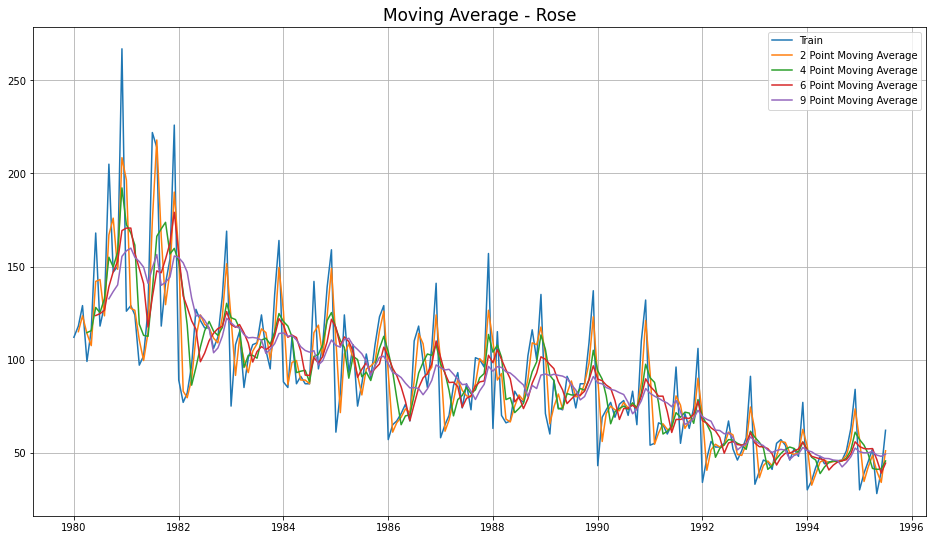

In [92]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Rose', fontsize=17)
plt.savefig('rose_ma.jpg', bbox_inches='tight');

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [93]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

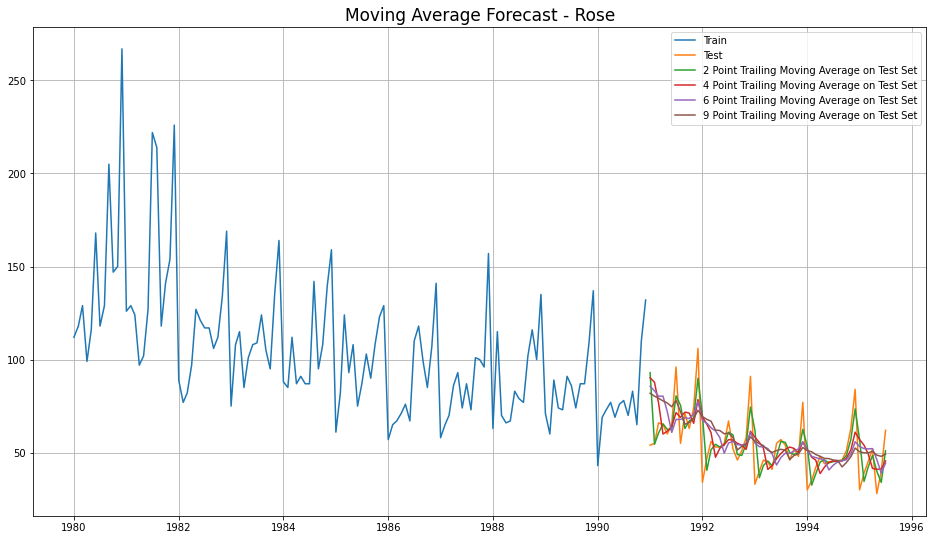

In [94]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);
plt.savefig('rose_ma_test.jpg', bbox_inches='tight');

### Model Evaluation

##### Done only on the test data.

In [95]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [96]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_41.to_csv('rose_ma.csv')
resultsDf_41

Test RMSE Rose
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

## Method 4: Moving Average(MA) - Sparkling

In [97]:
MovingAverage = dfs.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

#### Trailing moving averages

In [98]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

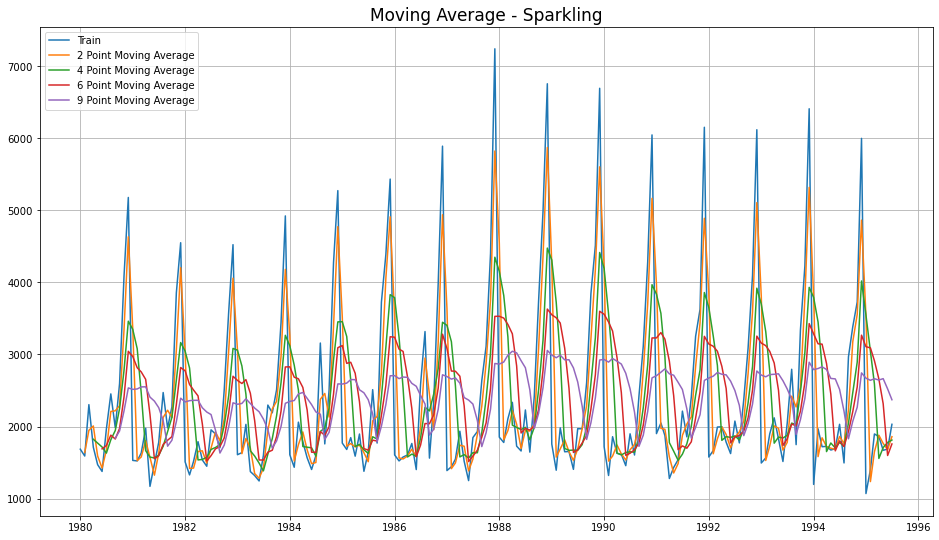

In [99]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)
plt.savefig('spark_ma.jpg', bbox_inches='tight');

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [100]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

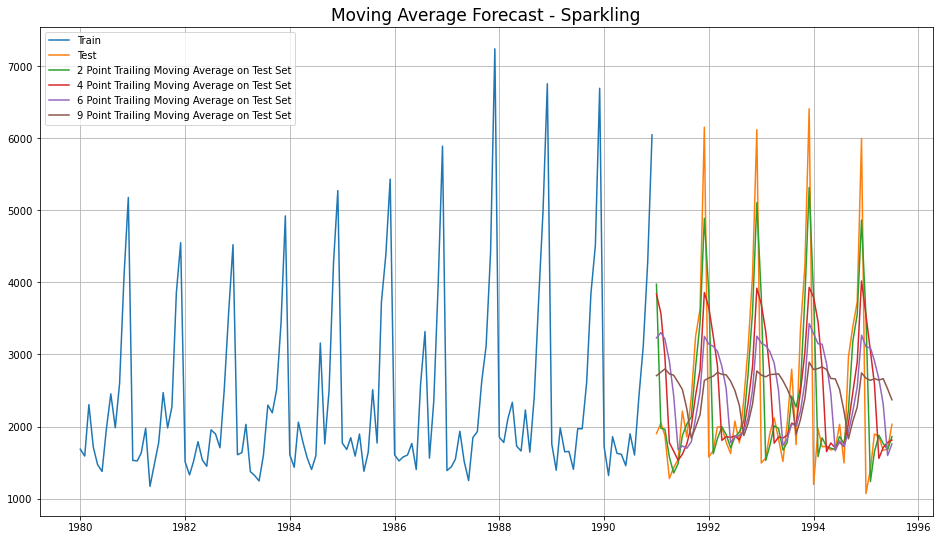

In [101]:
## Plotting on Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)
plt.savefig('spark_ma_test.jpg', bbox_inches='tight');

### Model Evaluation

##### Done only on the test data.

In [102]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [103]:
resultsDf_42 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_42.to_csv('spark_ma.csv')
resultsDf_42

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [104]:
resultsDf6 = resultsDf_41.join(resultsDf_42, how='outer')
resultsDf6

Test RMSE Rose  Test RMSE Sparkling
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [105]:
resultsDf7 = pd.concat([resultsDf, resultsDf6], axis=0)
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [106]:
resultsDf = resultsDf7.copy()
resultsDf.to_csv('results_ma.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

## Consolidated plots of All Models- Rose

In [107]:
# LR on Rose
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Rose
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]

# SA on Rose
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()

# MA on Rose

MovingAverage = dfr.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']


LinearRegression()

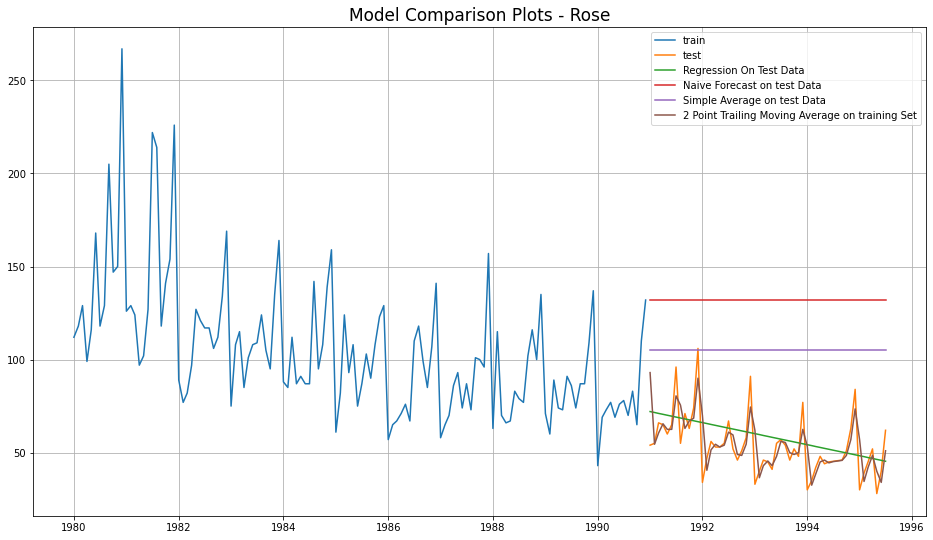

In [108]:
## Plotting on both rtraining and rtest data

plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

## Consolidated plots of All Models- Sparkling

In [109]:
# LR on Sparkling
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Sparkling
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]

# SA on Sparkling
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

# MA on Sparkling

MovingAverage = dfs.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']


LinearRegression()

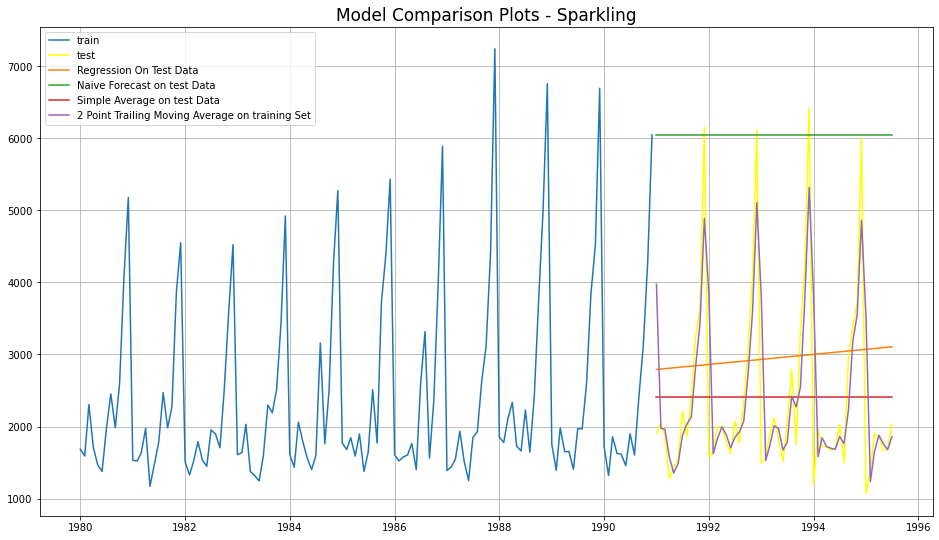

In [110]:
## Plotting on both rtraining and rtest data

plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

# Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)

In [111]:
# Importing the necessary packages

import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

## SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors - ROSE


*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [112]:
# create class
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [113]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [114]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be almost 0.1

In [115]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87.104997
1994-05-01    87.104997
1994-06-01    87

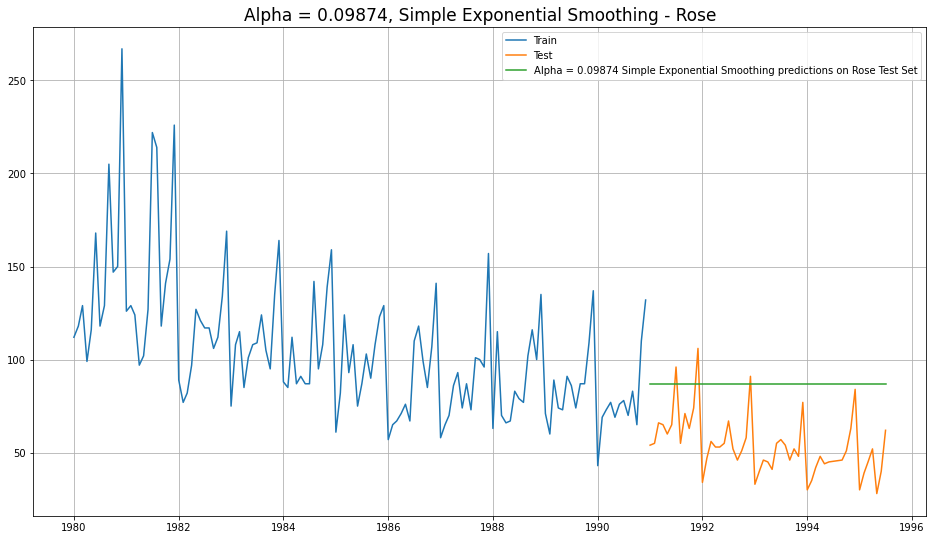

In [116]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);
plt.savefig('rose_ses.jpg', bbox_inches='tight');

In [117]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [118]:
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

SES RMSE: 36.79624054770398
SES RMSE (calculated using statsmodels): 36.796240547703974


In [119]:
resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(rtest.values,SES_predict_rose.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_rses

Test RMSE Rose
Simple Exponential Smoothing       36.796241

## SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors - SPARKLING


*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [120]:
# create class
model_SES = SimpleExpSmoothing(strain,initialization_method='estimated' )

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [121]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [122]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [123]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_spark = model_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
1991-06-01    2804.675124
1991-07-01    2804.675124
1991-08-01    2804.675124
1991-09-01    2804.675124
1991-10-01    2804.675124
1991-11-01    2804.675124
1991-12-01    2804.675124
1992-01-01    2804.675124
1992-02-01    2804.675124
1992-03-01    2804.675124
1992-04-01    2804.675124
1992-05-01    2804.675124
1992-06-01    2804.675124
1992-07-01    2804.675124
1992-08-01    2804.675124
1992-09-01    2804.675124
1992-10-01    2804.675124
1992-11-01    2804.675124
1992-12-01    2804.675124
1993-01-01    2804.675124
1993-02-01    2804.675124
1993-03-01    2804.675124
1993-04-01    2804.675124
1993-05-01    2804.675124
1993-06-01    2804.675124
1993-07-01    2804.675124
1993-08-01    2804.675124
1993-09-01    2804.675124
1993-10-01    2804.675124
1993-11-01    2804.675124
1993-12-01    2804.675124
1994-01-01    2804.675124
1994-02-01    2804.675124
1994-03-01  

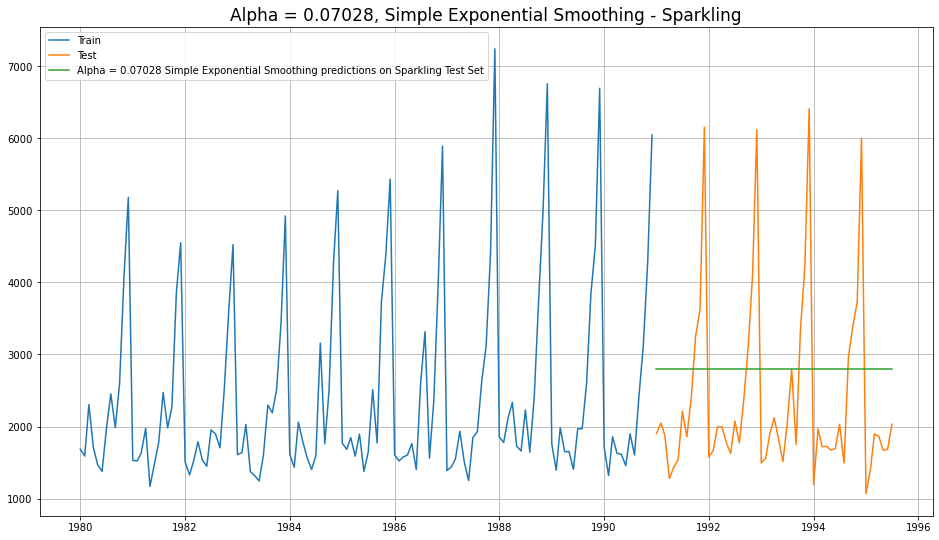

In [124]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);
plt.savefig('spark_ses.jpg', bbox_inches='tight');

In [125]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [126]:
print('SES RMSE:',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_spark.values)[0])

SES RMSE: 1338.0083844916467
SES RMSE (calculated using statsmodels): 2750.865722857491


In [127]:
resultsDf_sses = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(stest.values,SES_predict_spark.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_sses

Test RMSE Sparkling
Simple Exponential Smoothing          1338.008384

In [128]:
resultsDf7 = resultsDf_rses.join(resultsDf_sses, how='outer')
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
Simple Exponential Smoothing       36.796241          1338.008384

In [129]:
resultsDf8 = pd.concat([resultsDf, resultsDf7], axis=0)
resultsDf8

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796241          1338.008384

In [130]:
resultsDf = resultsDf8.copy()

## Holt - ETS(A, A, N) - Holt's linear method with additive errors - Rose

## Double Exponential Smoothing - Rose

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

In [131]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(rtrain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [132]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

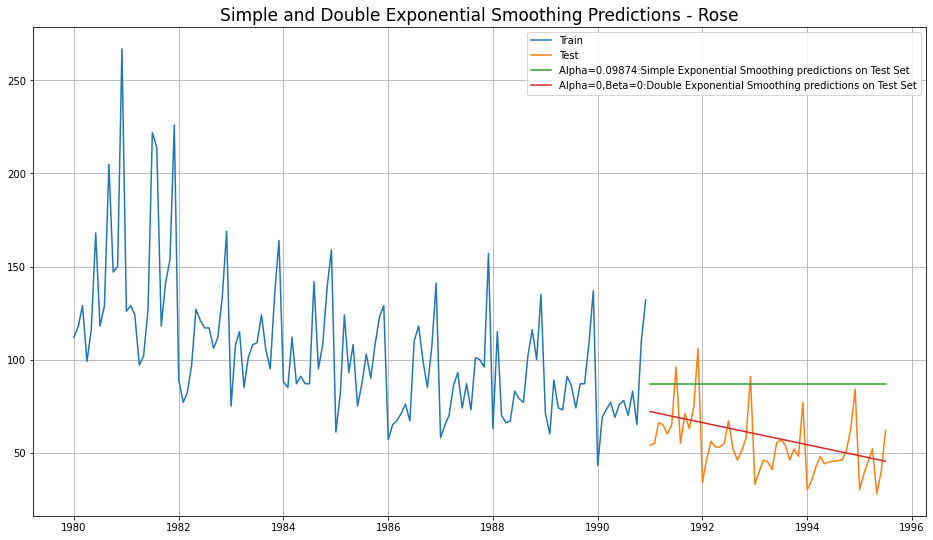

In [133]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);
plt.savefig('rose_rdes.jpg', bbox_inches='tight');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [134]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 15.268943764436564


In [135]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Double Exponential Smoothing       15.268944

## Holt - ETS(A, A, N) - Holt's linear method with additive errors - Sparkling

## Double Exponential Smoothing - Sparkling



In [136]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(strain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [137]:
# Forecasting using this model for the duration of the test set
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

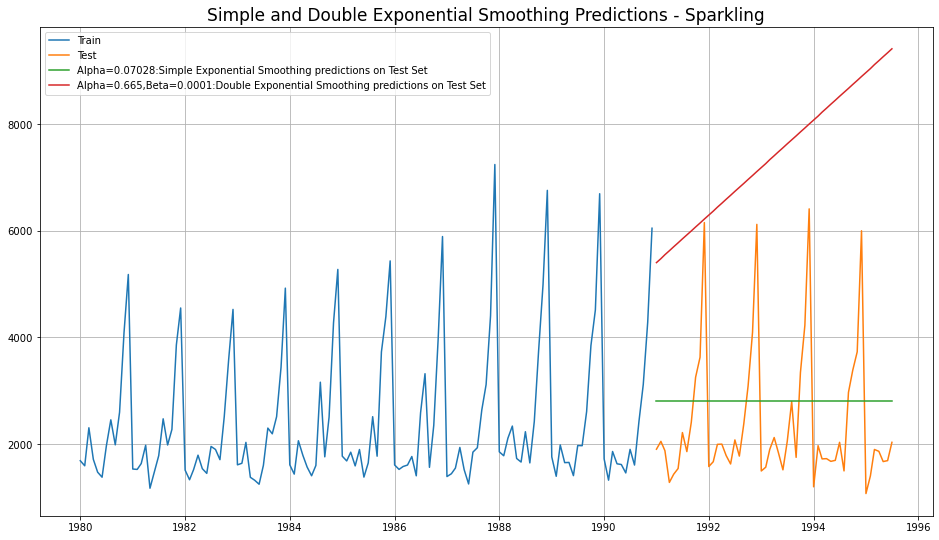

In [138]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);
plt.savefig('spark_des.jpg', bbox_inches='tight');

In [139]:
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 5291.8798332269125


In [140]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Double Exponential Smoothing          5291.879833

In [141]:
resultsDf9 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf9

Test RMSE Rose  Test RMSE Sparkling
Double Exponential Smoothing       15.268944          5291.879833

In [142]:
resultsDf10 = pd.concat([resultsDf, resultsDf9], axis=0)
resultsDf10

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796241          1338.008384
Double Exponential Smoothing       15.268944          5291.879833

In [143]:
resultsDf = resultsDf10.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796241          1338.008384
Double Exponential Smoothing       15.268944          5291.879833

### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

<!-- The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast. -->

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - ROSE

In [144]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
       -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
         4.79381122,   2.96110122,  21.05738849,  63.18279918]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [145]:
# Forecasting using this model for the duration of the test set
TES_predict_add_rose =  model_TES.forecast(len(rtest))
TES_predict_add_rose

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     42.684928
1991-02-01     54.564005
1991-03-01     61.995209
1991-04-01     50.852018
1991-05-01     59.034271
1991-06-01     63.850901
1991-07-01     73.190805
1991-08-01     78.724624
1991-09-01     74.276280
1991-10-01     71.895000
1991-11-01     89.444365
1991-12-01    131.042724
1992-01-01     36.119272
1992-02-01     47.998349
1992-03-01     55.429553
1992-04-01     44.286362
1992-05-01     52.468615
1992-06-01     57.285245
1992-07-01     66.625149
1992-08-01     72.158968
1992-09-01     67.710624
1992-10-01     65.329344
1992-11-01     82.878709
1992-12-01    124.477068
1993-01-01     29.553616
1993-02-01     41.432693
1993-03-01     48.863898
1993-04-01     37.720706
1993-05-01     45.902959
1993-06-01     50.719589
1993-07-01     60.059493
1993-08-01     65.593312
1993-09-01     61.144968
1993-10-01     58.763688
1993-11-01     76.313053
1993-12-01    117.911412
1994-01-01     22.987961
1994-02-01     34.867037
1994-03-01     42.298242
1994-04-01     31.155050


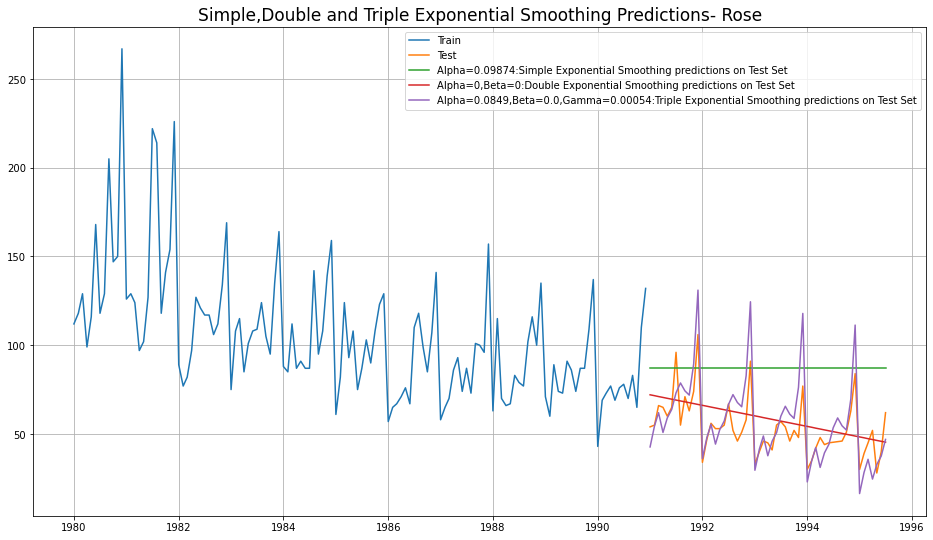

In [146]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);
plt.savefig('rose_add_tes.jpg', bbox_inches='tight');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [147]:
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False))

TES RMSE: 14.249660750768982


In [148]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season)       14.249661

### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

<!-- But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set. -->

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - SPARKLING

In [149]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127227248079453, 'smoothing_trend': 0.012360804305088534, 'smoothing_seasonal': 0.46071766688111543, 'damping_trend': nan, 'initial_level': 2356.577980956387, 'initial_trend': -0.10243675533021725, 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
       -808.42473284, -815.34991402, -384.23065038,   72.99484403,
       -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [150]:
# Forecasting using this model for the duration of the test set
TES_predict_add_spark =  model_TES.forecast(len(stest))
TES_predict_add_spark

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1490.402890
1991-02-01    1204.525152
1991-03-01    1688.734182
1991-04-01    1551.226125
1991-05-01    1461.197883
1991-06-01    1278.646707
1991-07-01    1804.885616
1991-08-01    1678.955032
1991-09-01    2315.373126
1991-10-01    3224.976222
1991-11-01    4299.301434
1991-12-01    6410.712237
1992-01-01    1482.829908
1992-02-01    1196.952170
1992-03-01    1681.161200
1992-04-01    1543.653143
1992-05-01    1453.624901
1992-06-01    1271.073725
1992-07-01    1797.312634
1992-08-01    1671.382050
1992-09-01    2307.800144
1992-10-01    3217.403240
1992-11-01    4291.728452
1992-12-01    6403.139255
1993-01-01    1475.256926
1993-02-01    1189.379188
1993-03-01    1673.588218
1993-04-01    1536.080160
1993-05-01    1446.051919
1993-06-01    1263.500743
1993-07-01    1789.739652
1993-08-01    1663.809068
1993-09-01    2300.227162
1993-10-01    3209.830258
1993-11-01    4284.155470
1993-12-01    6395.566273
1994-01-01    1467.683944
1994-02-01    1181.806206
1994-03-01  

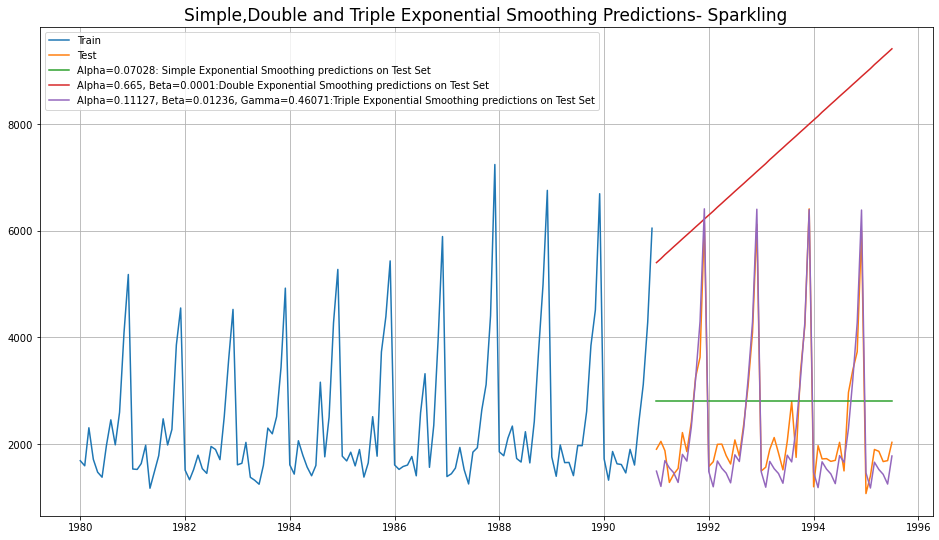

In [151]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling', fontsize=17);
plt.savefig('spark_add_tes.jpg', bbox_inches='tight');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [152]:
print('TES RMSE:',mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False))

TES RMSE: 378.95102286703


In [153]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)           378.951023

In [154]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season)       14.249661   

                                                Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season)           378.951023

In [155]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                     15.268955   
NaiveModel                                           79.718773   
SimpleAverageModel                                   53.460570   
2pointTrailingMovingAverage                          11.529278   
4pointTrailingMovingAverage                          14.451403   
6pointTrailingMovingAverage                          14.566327   
9pointTrailingMovingAverage                          14.727630   
Simple Exponential Smoothing                         36.796241   
Double Exponential Smoothing                         15.268944   
Triple Exponential Smoothing (Additive Season)       14.249661   

                                                Test RMSE Sparkling  
RegressionOnTime                                        1389.135175  
NaiveModel                                              3864.279352  
SimpleAverageModel                                      1275.081804  
2pointTrailingMovingAverage                              813.400684  
4pointTrailingMovingAverage                             1156.589694  
6pointTrailingMovingAverage                             1283.927428  
9pointTrailingMovingAverage                             1346.278315  
Simple Exponential Smoothing                            1338.008384  
Double Exponential Smoothing                            5291.879833  
Triple Exponential Smoothing (Additive Season)           378.951023

In [156]:
resultsDf = resultsDf12.copy()

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE

### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [157]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0715106306609405, 'smoothing_trend': 0.04529179757535142, 'smoothing_seasonal': 7.244325029450242e-05, 'damping_trend': nan, 'initial_level': 130.40839142502193, 'initial_trend': -0.77985743179386, 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
       1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
       1.44724625, 1.99553681]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [158]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     56.321655
1991-02-01     63.664690
1991-03-01     69.374024
1991-04-01     60.435528
1991-05-01     67.758341
1991-06-01     73.546478
1991-07-01     80.630117
1991-08-01     85.541323
1991-09-01     80.707713
1991-10-01     78.764555
1991-11-01     91.531230
1991-12-01    125.788433
1992-01-01     54.168902
1992-02-01     61.223492
1992-03-01     66.705377
1992-04-01     58.103246
1992-05-01     65.135026
1992-06-01     70.689855
1992-07-01     77.488188
1992-08-01     82.197159
1992-09-01     77.542202
1992-10-01     75.665128
1992-11-01     87.917577
1992-12-01    120.805914
1993-01-01     52.016149
1993-02-01     58.782294
1993-03-01     64.036730
1993-04-01     55.770964
1993-05-01     62.511711
1993-06-01     67.833232
1993-07-01     74.346259
1993-08-01     78.852995
1993-09-01     74.376691
1993-10-01     72.565700
1993-11-01     84.303925
1993-12-01    115.823395
1994-01-01     49.863396
1994-02-01     56.341097
1994-03-01     61.368082
1994-04-01     53.438682


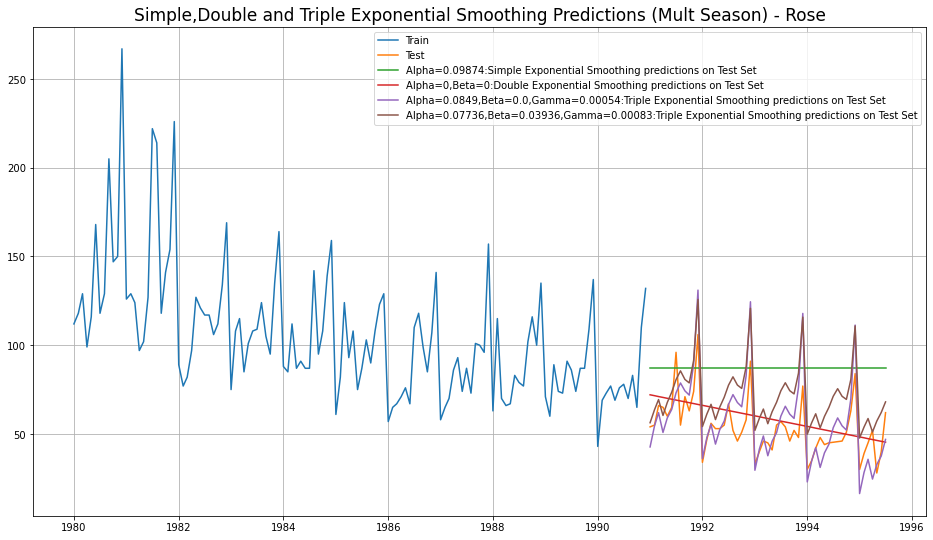

In [159]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

plt.savefig('rose_mul_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [160]:
print('TES_am RMSE_rose:',mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 20.156762582665337


In [161]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       20.156763

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

<!-- There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set. -->

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - SPARKLING

### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [162]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11133818361298699, 'smoothing_trend': 0.049505131019509915, 'smoothing_seasonal': 0.3620795793580111, 'damping_trend': nan, 'initial_level': 2356.4967888704355, 'initial_trend': -10.187944726007238, 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
       0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
       1.87340336, 2.37811768]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [163]:
# Forecasting using this model for the duration of the test set
TES_predict_am_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_spark

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1587.497468
1991-02-01    1356.394925
1991-03-01    1762.929755
1991-04-01    1656.165933
1991-05-01    1542.002730
1991-06-01    1355.102435
1991-07-01    1854.197719
1991-08-01    1820.513188
1991-09-01    2276.971718
1991-10-01    3122.024202
1991-11-01    4128.528561
1991-12-01    5890.064588
1992-01-01    1538.233708
1992-02-01    1314.193684
1992-03-01    1707.937498
1992-04-01    1604.369388
1992-05-01    1493.650618
1992-06-01    1312.499576
1992-07-01    1795.750753
1992-08-01    1762.976871
1992-09-01    2204.819253
1992-10-01    3022.831861
1992-11-01    3997.009544
1992-12-01    5701.930382
1993-01-01    1488.969948
1993-02-01    1271.992443
1993-03-01    1652.945240
1993-04-01    1552.572843
1993-05-01    1445.298507
1993-06-01    1269.896716
1993-07-01    1737.303788
1993-08-01    1705.440555
1993-09-01    2132.666788
1993-10-01    2923.639519
1993-11-01    3865.490526
1993-12-01    5513.796176
1994-01-01    1439.706189
1994-02-01    1229.791202
1994-03-01  

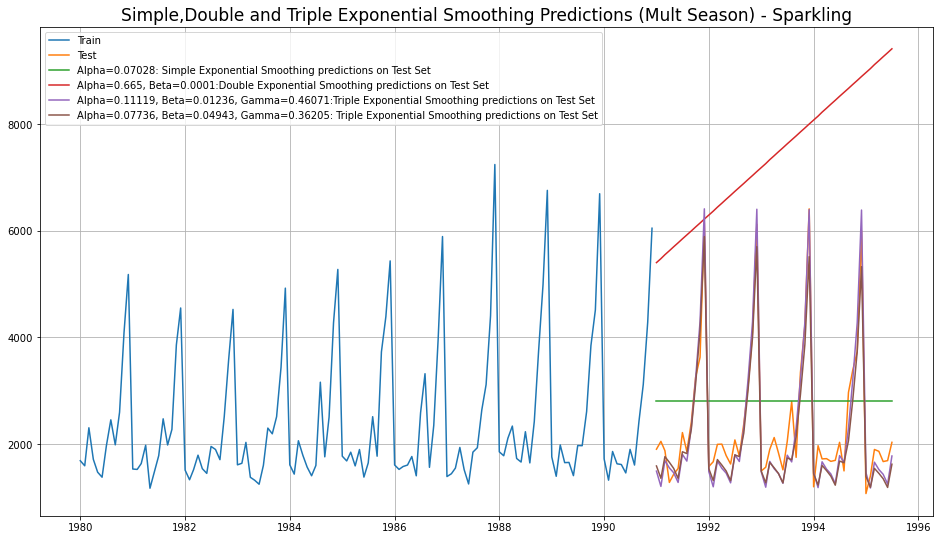

In [164]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);

plt.savefig('spark_mul_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [165]:
print('TES_am RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False))

TES_am RMSE_spark: 404.286809456071


In [166]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           404.286809

In [167]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...       20.156763   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           404.286809

In [168]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268944   
Triple Exponential Smoothing (Additive Season)           14.249661   
Triple Exponential Smoothing (Multiplicative Se...       20.156763   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.008384  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.951023  
Triple Exponential Smoothing (Multiplicative Se...           404.286809

In [169]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268944   
Triple Exponential Smoothing (Additive Season)           14.249661   
Triple Exponential Smoothing (Multiplicative Se...       20.156763   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.008384  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.951023  
Triple Exponential Smoothing (Multiplicative Se...           404.286809

In [170]:
resultsDf.to_csv('results_all.csv')

## Holt-Winters - ETS(A, Ad, A) - Holt Winter's linear method with additive errors - ROSE

### USING DAMPED TREND

In [171]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07368619699755712, 'smoothing_trend': 0.009797991128366655, 'smoothing_seasonal': 0.07330138329105369, 'damping_trend': 0.9756260777932113, 'initial_level': 154.92183119579653, 'initial_trend': -1.5746552369872022, 'initial_seasons': array([-30.47551091, -18.83938002, -10.75861958, -22.3615668 ,
       -12.99160054,  -6.55422732,   3.90246506,  10.59629087,
         6.04147917,   3.40128252,  21.45637051,  66.2302775 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [172]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_rose =  model_TES.forecast(len(rtest))
TES_predict_add_damp_rose

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     48.344380
1991-02-01     60.974057
1991-03-01     68.394566
1991-04-01     58.217248
1991-05-01     65.897567
1991-06-01     70.871897
1991-07-01     80.535628
1991-08-01     85.891835
1991-09-01     83.333132
1991-10-01     81.304062
1991-11-01     99.375426
1991-12-01    141.365521
1992-01-01     47.183518
1992-02-01     59.841490
1992-03-01     67.289603
1992-04-01     57.139218
1992-05-01     64.845813
1992-06-01     69.845778
1992-07-01     79.534519
1992-08-01     84.915127
1992-09-01     82.380231
1992-10-01     80.374387
1992-11-01     98.468411
1992-12-01    140.480613
1993-01-01     46.320179
1993-02-01     58.999193
1993-03-01     66.467837
1993-04-01     56.337482
1993-05-01     64.063618
1993-06-01     69.082649
1993-07-01     78.789990
1993-08-01     84.188745
1993-09-01     81.671554
1993-10-01     79.682983
1993-11-01     97.793858
1993-12-01    139.822503
1994-01-01     45.678109
1994-02-01     58.372773
1994-03-01     65.856685
1994-04-01     55.741226


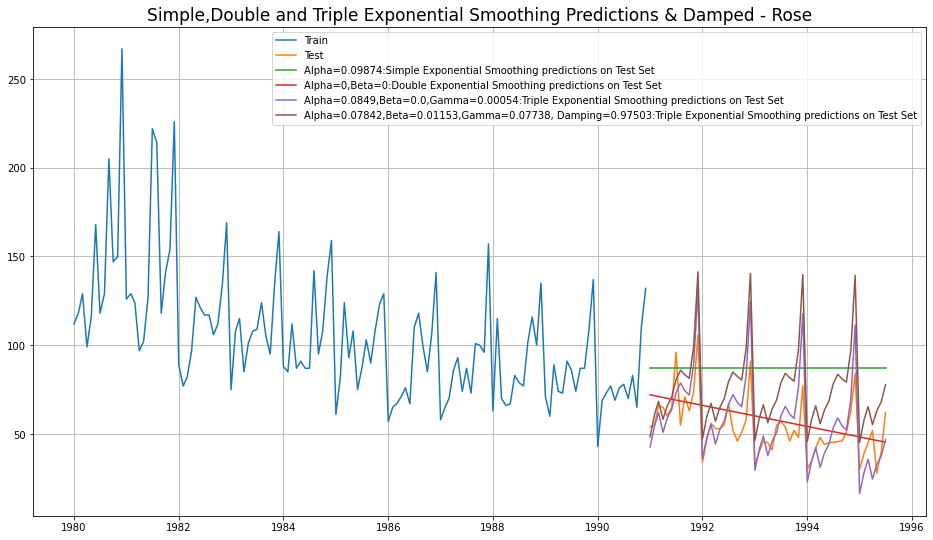

In [173]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_rose, label='Alpha=0.07842,Beta=0.01153,Gamma=0.07738, Damping=0.97503:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions & Damped - Rose', fontsize=17);
plt.savefig('rose_add_damp_tes.jpg', bbox_inches='tight');

In [174]:
print('TES RMSE DAMPED ROSE:',mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False))

TES RMSE DAMPED ROSE: 26.360083280893402


In [175]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season, ...       26.360083

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - SPARKLING

### USING DAMPED TREND

In [176]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1113017171885065, 'smoothing_trend': 0.00010018137377728859, 'smoothing_seasonal': 0.4606871390332535, 'damping_trend': 0.9900012953156662, 'initial_level': 2356.676509027515, 'initial_trend': -0.025121819628187936, 'initial_seasons': array([-636.23261565, -722.98111541, -398.62650805, -473.42656036,
       -808.42308425, -815.34790078, -384.22298782,   73.00979409,
       -237.44179094,  272.33251748, 1541.39960319, 2590.09594423]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [177]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_spark =  model_TES.forecast(len(stest))
TES_predict_add_damp_spark

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1484.938223
1991-02-01    1200.767326
1991-03-01    1686.375144
1991-04-01    1550.217242
1991-05-01    1461.257790
1991-06-01    1279.677263
1991-07-01    1806.832804
1991-08-01    1681.668966
1991-09-01    2318.217532
1991-10-01    3228.147133
1991-11-01    4302.856243
1991-12-01    6410.941726
1992-01-01    1484.804393
1992-02-01    1200.634834
1992-03-01    1686.243977
1992-04-01    1550.087387
1992-05-01    1461.129232
1992-06-01    1279.549991
1992-07-01    1806.706805
1992-08-01    1681.544226
1992-09-01    2318.094039
1992-10-01    3228.024876
1992-11-01    4302.735208
1992-12-01    6410.821901
1993-01-01    1484.685766
1993-02-01    1200.517393
1993-03-01    1686.127710
1993-04-01    1549.972283
1993-05-01    1461.015279
1993-06-01    1279.437177
1993-07-01    1806.595119
1993-08-01    1681.433657
1993-09-01    2317.984576
1993-10-01    3227.916507
1993-11-01    4302.627923
1993-12-01    6410.715689
1994-01-01    1484.580616
1994-02-01    1200.413294
1994-03-01  

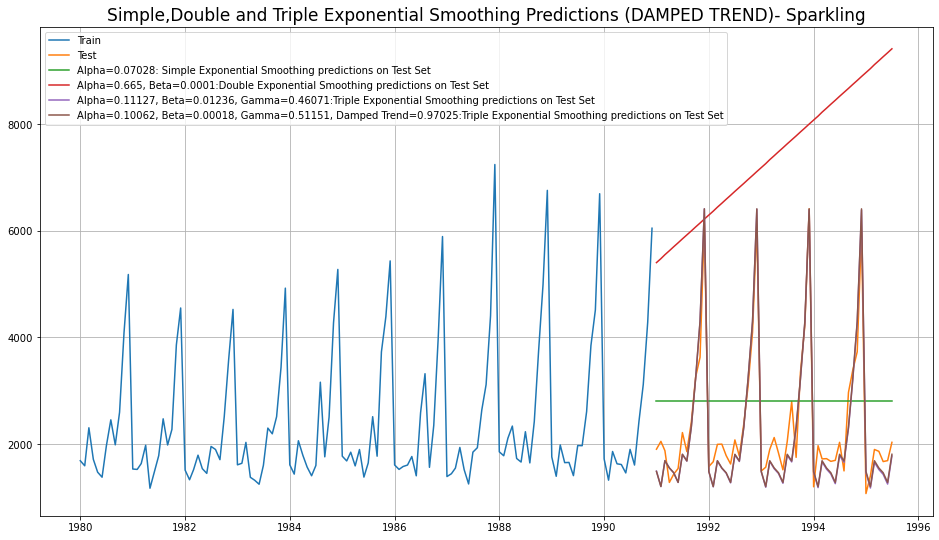

In [178]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_spark, label='Alpha=0.10062, Beta=0.00018, Gamma=0.51151, Damped Trend=0.97025:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (DAMPED TREND)- Sparkling', fontsize=17);
plt.savefig('spark_add_damp_tes.jpg', bbox_inches='tight');

In [179]:
print('TES RMSE SPARK DAMPED:',mean_squared_error(stest.values,TES_predict_add_damp_spark.values,squared=False))

TES RMSE SPARK DAMPED: 373.592876649026


In [180]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season, ...           378.951023

In [181]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season, ...       26.360083   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season, ...           378.951023

In [182]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268944   
Triple Exponential Smoothing (Additive Season)           14.249661   
Triple Exponential Smoothing (Multiplicative Se...       20.156763   
Triple Exponential Smoothing (Additive Season, ...       26.360083   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.008384  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.951023  
Triple Exponential Smoothing (Multiplicative Se...           404.286809  
Triple Exponential Smoothing (Additive Season, ...           378.951023

In [183]:
resultsDf = resultsDf12.copy()

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE

### USING DAMPED TREND

### ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

In [184]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 7.339815646826097e-07, 'smoothing_trend': 3.874477577718832e-07, 'smoothing_seasonal': 5.495855487816384e-07, 'damping_trend': 0.9795710334671273, 'initial_level': 202.0316191169019, 'initial_trend': -2.296661268088203, 'initial_seasons': array([0.57958528, 0.65901604, 0.71880369, 0.62986019, 0.70479456,
       0.76518152, 0.83850031, 0.89018724, 0.8566111 , 0.83178635,
       0.9685935 , 1.32823642]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [185]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_damp_rose

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     57.367639
1991-02-01     65.134514
1991-03-01     70.941931
1991-04-01     62.076370
1991-05-01     69.365836
1991-06-01     75.207281
1991-07-01     82.304264
1991-08-01     87.264007
1991-09-01     83.865446
1991-10-01     81.333110
1991-11-01     94.594046
1991-12-01    129.561042
1992-01-01     56.468121
1992-02-01     64.132613
1992-03-01     69.871459
1992-04-01     61.157519
1992-05-01     68.358675
1992-06-01     74.136164
1992-07-01     81.154492
1992-08-01     86.068298
1992-09-01     82.738342
1992-10-01     80.261028
1992-11-01     93.371138
1992-12-01    127.918322
1993-01-01     55.765952
1993-02-01     63.350525
1993-03-01     69.035844
1993-04-01     60.440260
1993-05-01     67.572479
1993-06-01     73.300045
1993-07-01     80.256975
1993-08-01     85.134921
1993-09-01     81.858519
1993-10-01     79.424155
1993-11-01     92.416530
1993-12-01    126.636007
1994-01-01     55.217836
1994-02-01     62.740022
1994-03-01     68.383559
1994-04-01     59.880364


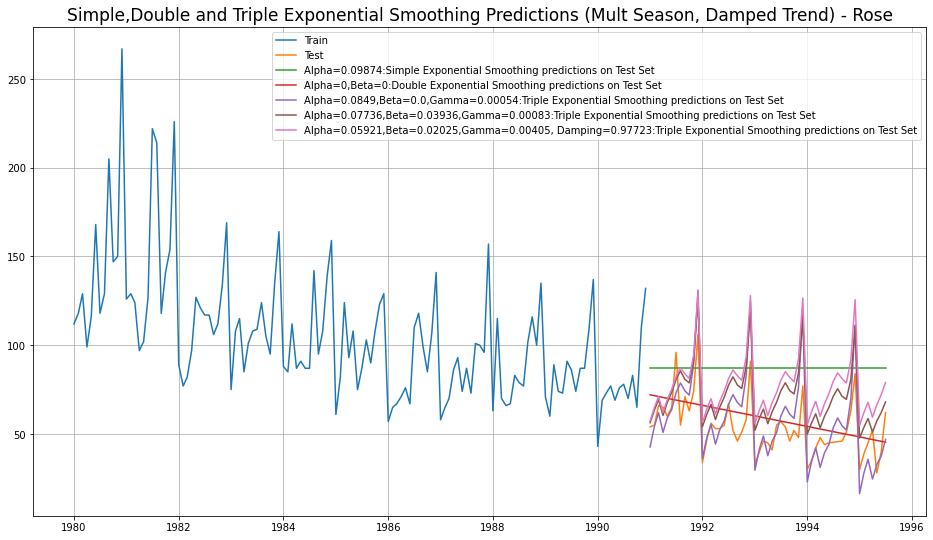

In [186]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_rose, label='Alpha=0.05921,Beta=0.02025,Gamma=0.00405, Damping=0.97723:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, Damped Trend) - Rose', fontsize=17);

plt.savefig('rose_mul_damp_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [187]:
print('TES_am RMSE_rose DAMPED:',mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False))

TES_am RMSE_rose DAMPED: 25.955974115109736


In [188]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       25.955974

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - SPARKLING

### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

### USING DAMPED TREND

In [189]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107145688834996, 'smoothing_trend': 0.03702380484023058, 'smoothing_seasonal': 0.3950796036927054, 'damping_trend': 0.989999982825801, 'initial_level': 2356.5418225391713, 'initial_trend': -9.179983811285757, 'initial_seasons': array([0.71376402, 0.68480093, 0.8987767 , 0.80479264, 0.65367399,
       0.65451036, 0.87932809, 1.12218765, 0.91400703, 1.19092482,
       1.8470586 , 2.33460239]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [190]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1591.419944
1991-02-01    1348.093201
1991-03-01    1768.341538
1991-04-01    1654.055616
1991-05-01    1548.119140
1991-06-01    1363.577884
1991-07-01    1862.874659
1991-08-01    1797.371659
1991-09-01    2310.540570
1991-10-01    3163.686118
1991-11-01    4176.967042
1991-12-01    5994.204873
1992-01-01    1558.919671
1992-02-01    1320.788422
1992-03-01    1732.819735
1992-04-01    1621.103548
1992-05-01    1517.532320
1992-06-01    1336.860067
1992-07-01    1826.676252
1992-08-01    1762.736091
1992-09-01    2266.386531
1992-10-01    3103.732348
1992-11-01    4098.471618
1992-12-01    5882.500803
1993-01-01    1530.111926
1993-02-01    1296.585884
1993-03-01    1701.333753
1993-04-01    1591.895339
1993-05-01    1490.420632
1993-06-01    1313.177804
1993-07-01    1794.590538
1993-08-01    1732.035655
1993-09-01    2227.249068
1993-10-01    3050.590245
1993-11-01    4028.894477
1993-12-01    5783.488026
1994-01-01    1504.577182
1994-02-01    1275.133125
1994-03-01  

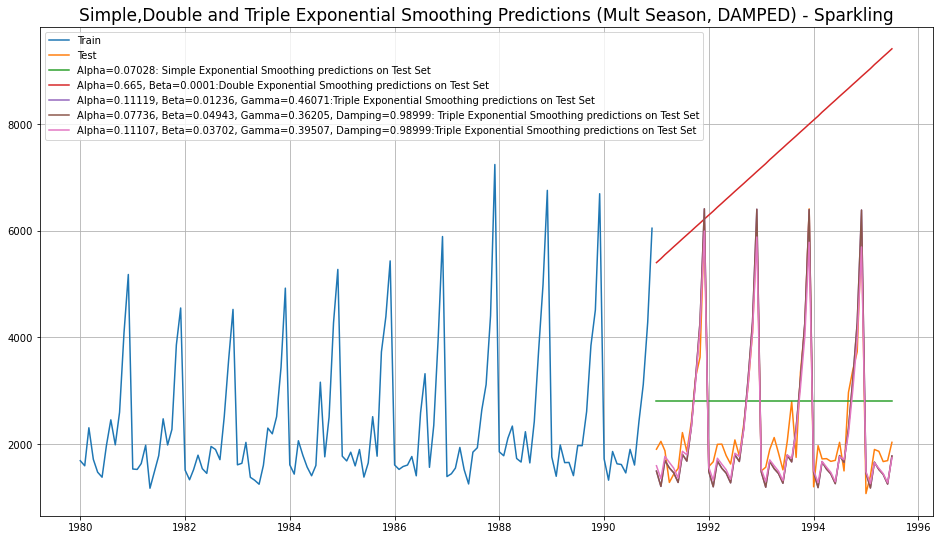

In [191]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205, Damping=0.98999: Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, DAMPED) - Sparkling', fontsize=17);

plt.savefig('spark_mul_damp_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [192]:
print('TES_am DAMPED RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False))

TES_am DAMPED RMSE_spark: 352.43982774135344


In [193]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           352.439828

In [194]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...       25.955974   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           352.439828

In [195]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268944   
Triple Exponential Smoothing (Additive Season)           14.249661   
Triple Exponential Smoothing (Multiplicative Se...       20.156763   
Triple Exponential Smoothing (Additive Season, ...       26.360083   
Triple Exponential Smoothing (Multiplicative Se...       25.955974   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.008384  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.951023  
Triple Exponential Smoothing (Multiplicative Se...           404.286809  
Triple Exponential Smoothing (Additive Season, ...           378.951023  
Triple Exponential Smoothing (Multiplicative Se...           352.439828

In [196]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268944   
Triple Exponential Smoothing (Additive Season)           14.249661   
Triple Exponential Smoothing (Multiplicative Se...       20.156763   
Triple Exponential Smoothing (Additive Season, ...       26.360083   
Triple Exponential Smoothing (Multiplicative Se...       25.955974   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.008384  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.951023  
Triple Exponential Smoothing (Multiplicative Se...           404.286809  
Triple Exponential Smoothing (Additive Season, ...           378.951023  
Triple Exponential Smoothing (Multiplicative Se...           352.439828

In [197]:
resultsDf.to_csv('results_all.csv')

## Best Model for Rose till Now - 2 Pt Moving Average

In [198]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [199]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [200]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

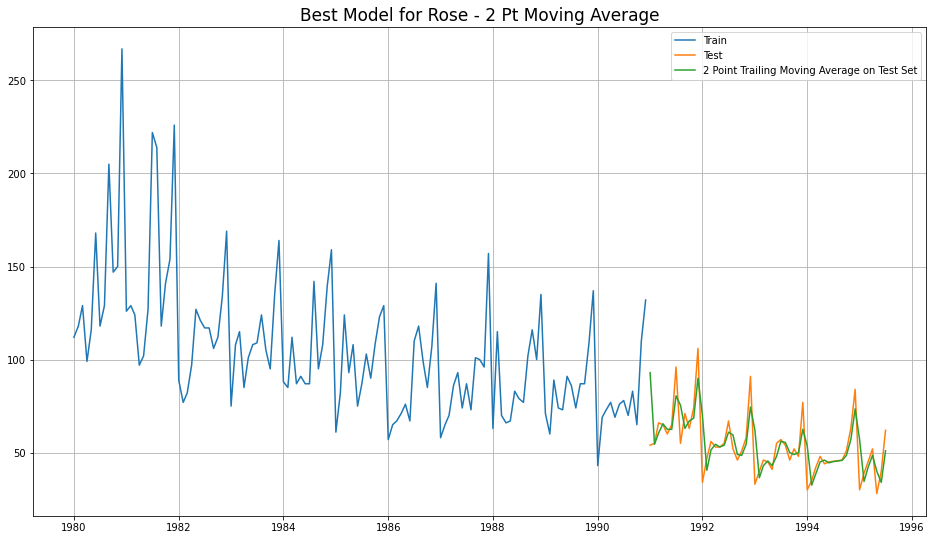

In [201]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

## Holt-Winters - ETS(A, A, M) - Best Model for Sparkling Till Now

### ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

### USING DAMPED TREND

In [202]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107145688834996, 'smoothing_trend': 0.03702380484023058, 'smoothing_seasonal': 0.3950796036927054, 'damping_trend': 0.989999982825801, 'initial_level': 2356.5418225391713, 'initial_trend': -9.179983811285757, 'initial_seasons': array([0.71376402, 0.68480093, 0.8987767 , 0.80479264, 0.65367399,
       0.65451036, 0.87932809, 1.12218765, 0.91400703, 1.19092482,
       1.8470586 , 2.33460239]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [203]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1591.419944
1991-02-01    1348.093201
1991-03-01    1768.341538
1991-04-01    1654.055616
1991-05-01    1548.119140
1991-06-01    1363.577884
1991-07-01    1862.874659
1991-08-01    1797.371659
1991-09-01    2310.540570
1991-10-01    3163.686118
1991-11-01    4176.967042
1991-12-01    5994.204873
1992-01-01    1558.919671
1992-02-01    1320.788422
1992-03-01    1732.819735
1992-04-01    1621.103548
1992-05-01    1517.532320
1992-06-01    1336.860067
1992-07-01    1826.676252
1992-08-01    1762.736091
1992-09-01    2266.386531
1992-10-01    3103.732348
1992-11-01    4098.471618
1992-12-01    5882.500803
1993-01-01    1530.111926
1993-02-01    1296.585884
1993-03-01    1701.333753
1993-04-01    1591.895339
1993-05-01    1490.420632
1993-06-01    1313.177804
1993-07-01    1794.590538
1993-08-01    1732.035655
1993-09-01    2227.249068
1993-10-01    3050.590245
1993-11-01    4028.894477
1993-12-01    5783.488026
1994-01-01    1504.577182
1994-02-01    1275.133125
1994-03-01  

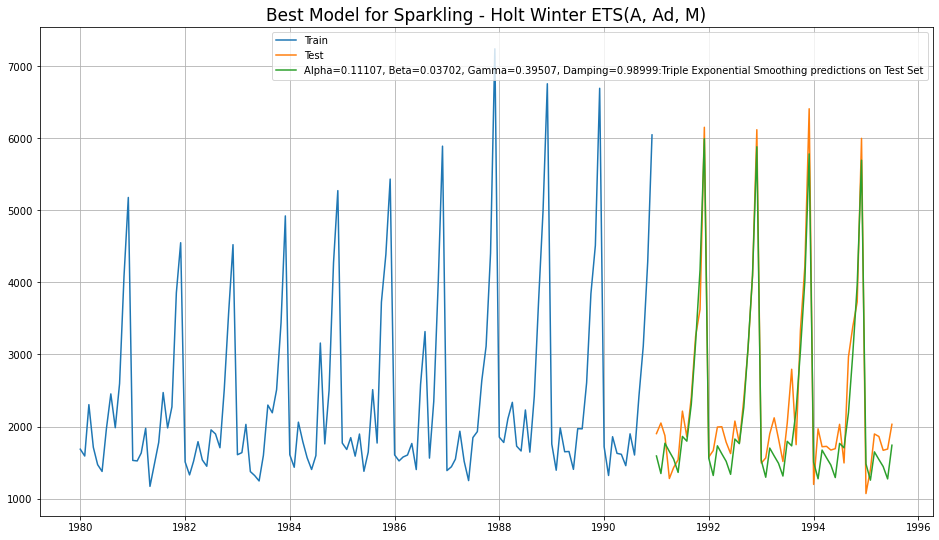

In [204]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Best Model for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_best_model.jpg', bbox_inches='tight');

# ==================================================================================================================

# ==================================================================================================================

## Check Stationarity of ROSE Data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [205]:
from statsmodels.tsa.stattools import adfuller

In [206]:
dfrs = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.46713716277931433
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [207]:
dfrs = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.015976115828316e-11
Number of lags used 12


We see that p-value < alpha=0.05
Hence, we reject the Null Hypothesis

We conclude that with a lag 1 - now the Rose data is Stationary

Now, let us go ahead and plot the stationary series.

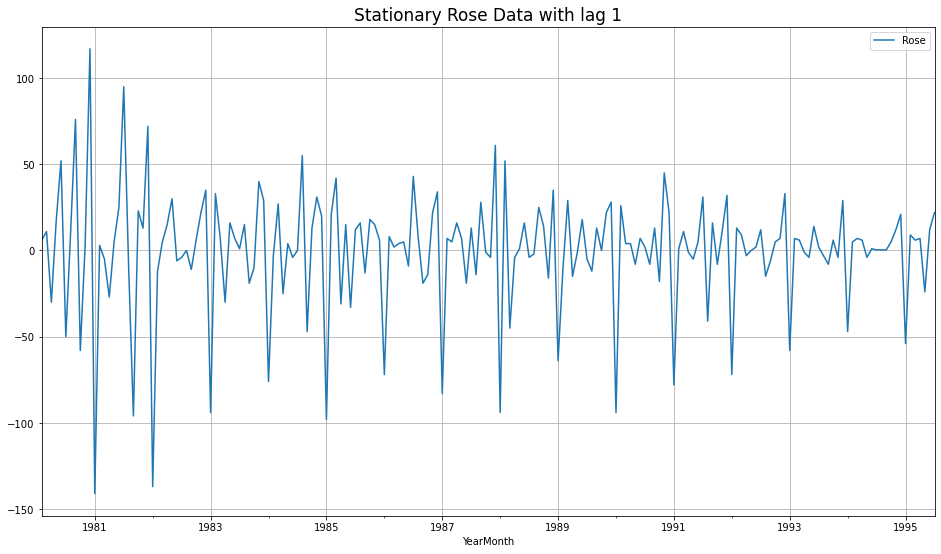

In [208]:
dfr.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);
plt.savefig('rose_stationary.jpg', bbox_inches='tight');

## Check Stationarity of SPARKLING Data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [209]:
dfss = adfuller(dfs,regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932417
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [210]:
dfss = adfuller(dfs.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


We see that p-value < alpha=0.05
Hence, we reject the Null Hypothesis

We conclude that with a lag 1 - now the Sparkling data is Stationary

Now, let us go ahead and plot the stationary series.

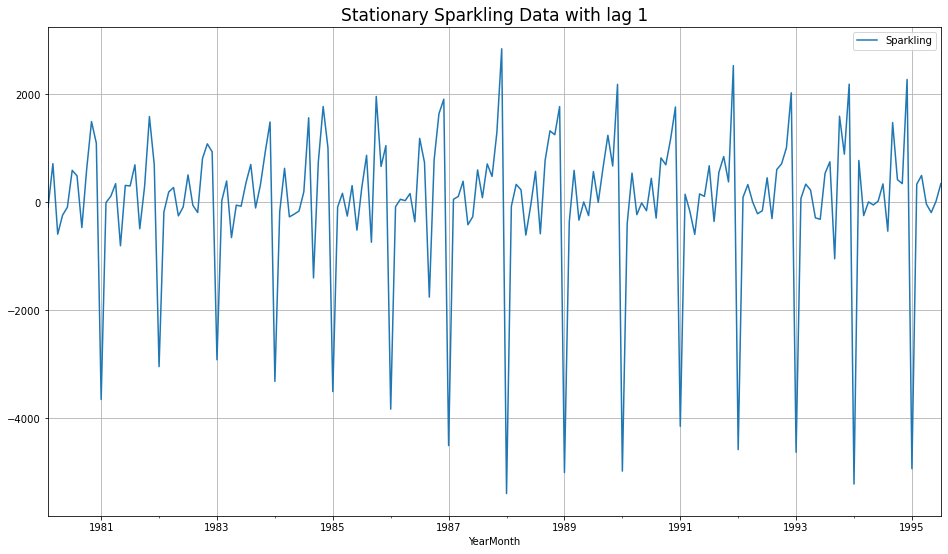

In [211]:
dfs.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);
plt.savefig('spark_stationary.jpg', bbox_inches='tight');


## ARIMA / SARIMA on ROSE

### Check for Stationarity of Rose Train Data

Let us plot the training data once.

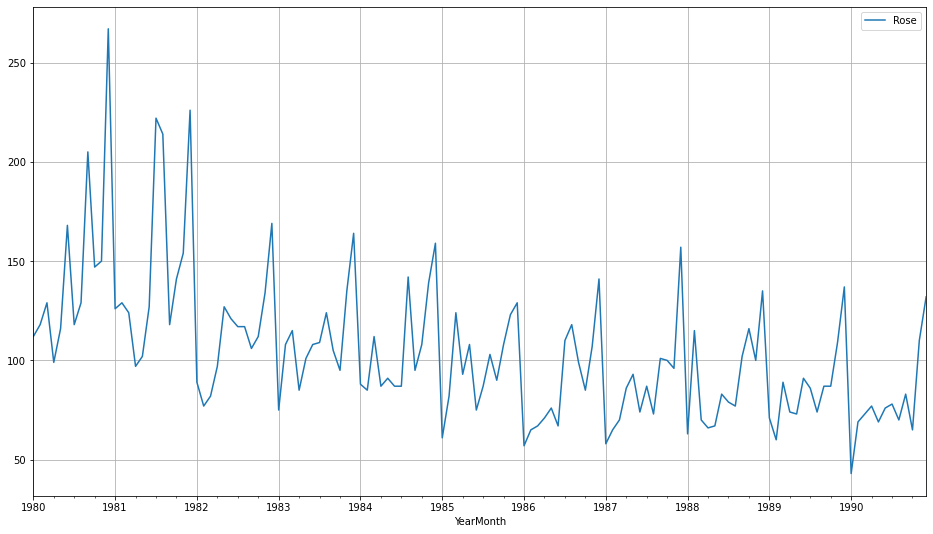

In [212]:
rtrain.plot(grid=True);

In [213]:
dftest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047064
Number of lags used 13


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [214]:
dftest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782412e-08
Number of lags used 12


p-value < 0.05 ------> So at 95% Confidence Interval. Train Rose data is Stationary with lag 1
Now, let us go ahead and plot the differenced training data.

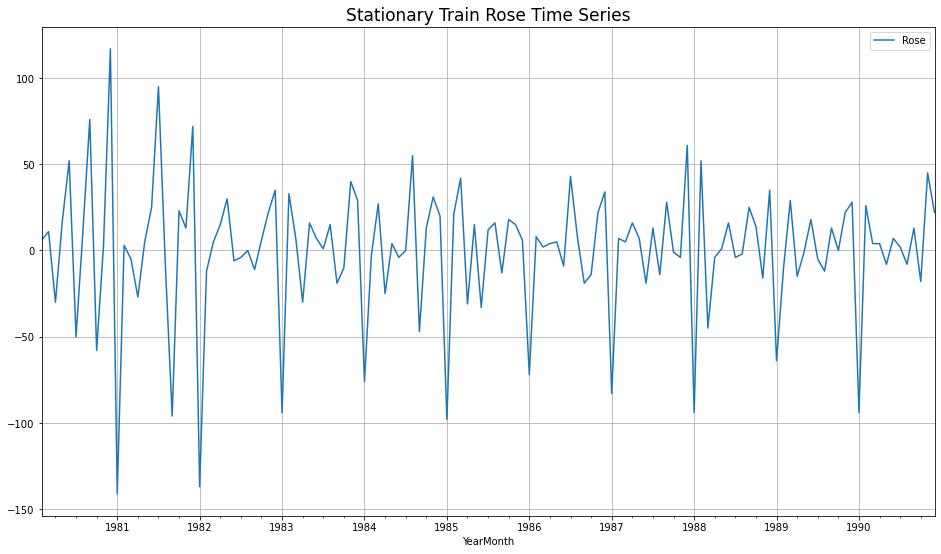

In [215]:
rtrain.diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)
plt.savefig('rose_train_stationary.jpg', bbox_inches='tight');

In [216]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But lets test on the lowest Akaike Information Criteria, which one suits best - ARIMA or SARIMA

In [217]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## As seen before, Stationarity is achived with a difference of 1.
## We have kept the value of d as 1

import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [218]:
# Creating an empty Dataframe with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [219]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231922
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543
ARIMA(2, 1, 2) - AIC:1281.8707222264356


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6954123405285
ARIMA(3, 1, 0) - AIC:1297.4810917271739
ARIMA(3, 1, 1) - AIC:1282.4192776271989


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6679167115944


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [220]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695412
15  (3, 1, 3)  1278.667917
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [221]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sat, 30 Jul 2022   AIC                           1274.695
Time:                        17:39:57   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6783      0.084    -19.999      0.000      -1.843      -1.514
ar.L2         -0.7291      0.084     -8.687      0.000      -0.894      -0.565
ma.L1          1.0446      0.618      1.691      0.0

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Rose Train Diagnostics plot.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


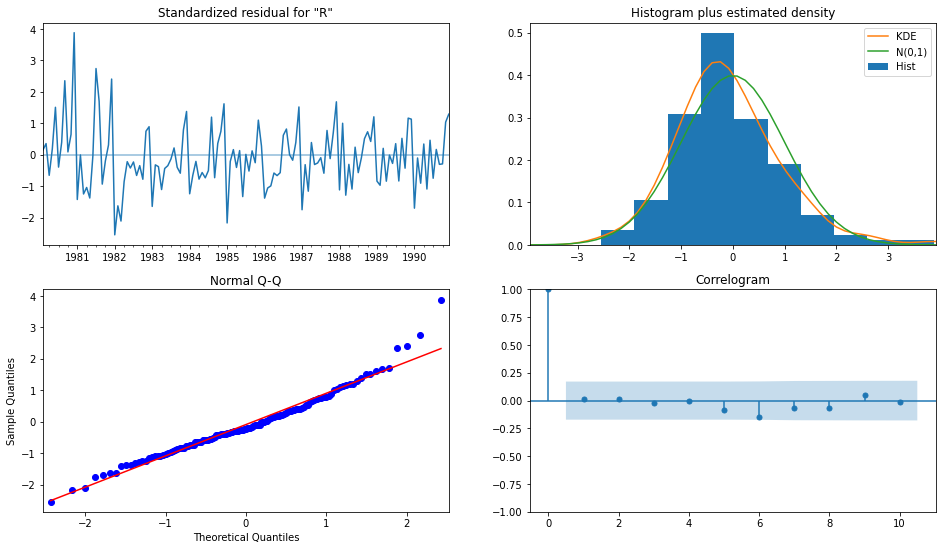

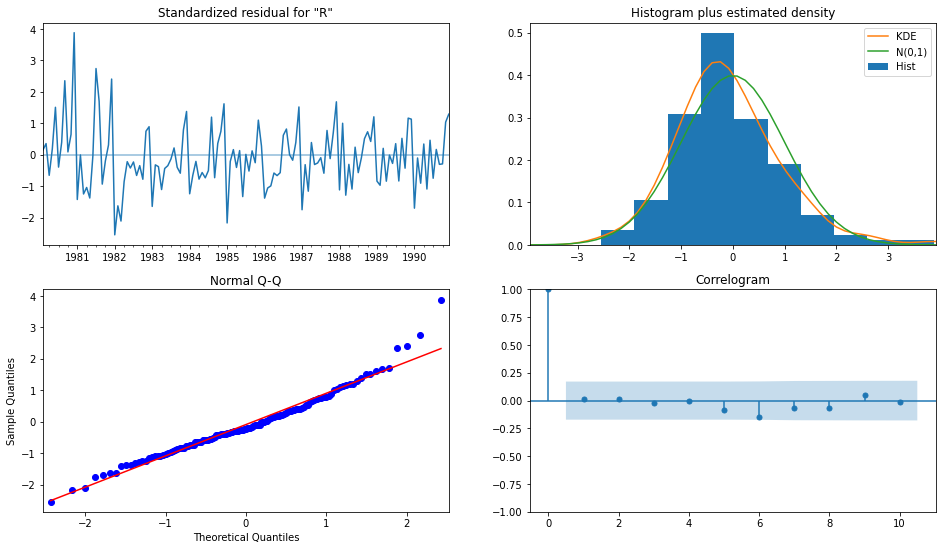

In [222]:

results_auto_ARIMA.plot_diagnostics();

plt.savefig('rose_diag_plot.jpg', bbox_inches='tight')

## Predict on the Rose Test Set using this model and evaluate the model.

In [223]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-01    85.595789
1991-02-01    90.535998
1991-03-01    81.967217
1991-04-01    92.746555
1991-05-01    80.902653
1991-06-01    92.921603
1991-07-01    81.384994
1991-08-01    91.984470
1991-09-01    82.606135
1991-10-01    90.618245
1991-11-01    84.008799
1991-12-01    89.260200
1992-01-01    85.265393
1992-02-01    88.141340
1992-03-01    86.227055
1992-04-01    87.343088
1992-05-01    86.865662
1992-06-01    86.853281
1992-07-01    87.222129
1992-08-01    86.612116
1992-09-01    87.366993
1992-10-01    86.544813
1992-11-01    87.374335
1992-12-01    86.581558
1993-01-01    87.307312
1993-02-01    86.667253
1993-03-01    87.212353
1993-04-01    86.764147
1993-05-01    87.118966
1993-06-01    86.850238
1993-07-01    87.042563
1993-08-01    86.915700
1993-09-01    86.988399
1993-10-01    86.958878
1993-11-01    86.955422
1993-12-01    86.982745
1994-01-01    86.939409
1994-02-01    86.992220
1994-03-01    86.935181
1994-04-01    86.992408
1994-05-01    86.937948
1994-06-01    86

In [224]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [225]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.812983948773486 
MAPE: 75.83899089518297


In [226]:
resultsR0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsR0.to_csv('rose_arima_auto_213.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.812984       75.838991

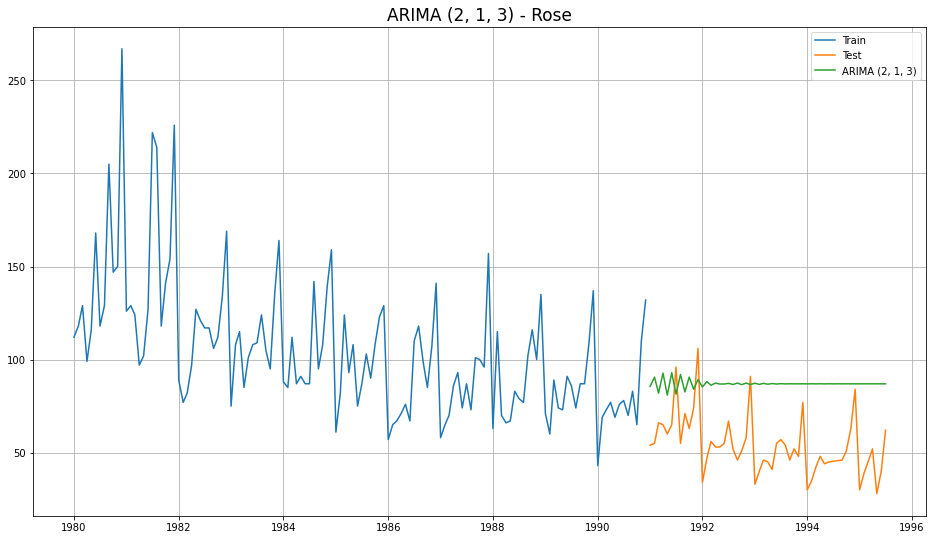

In [227]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

plt.savefig('rose_arima_auto_213.jpg', bbox_inches='tight');

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots on ROSE dataset

Let us look at the ACF and the PACF plots once more.

In [228]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

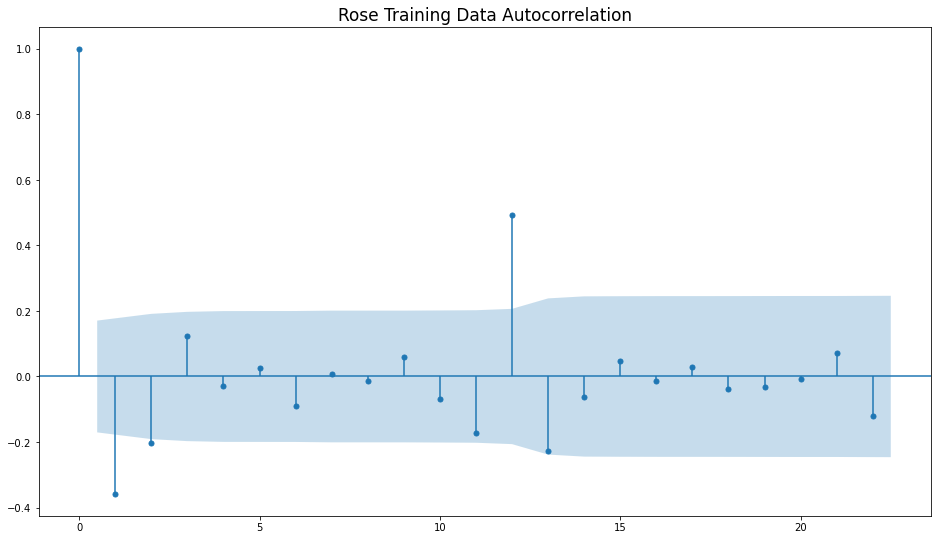

In [229]:
plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)
plt.savefig('rose_train_acf.jpg', bbox_inches='tight');


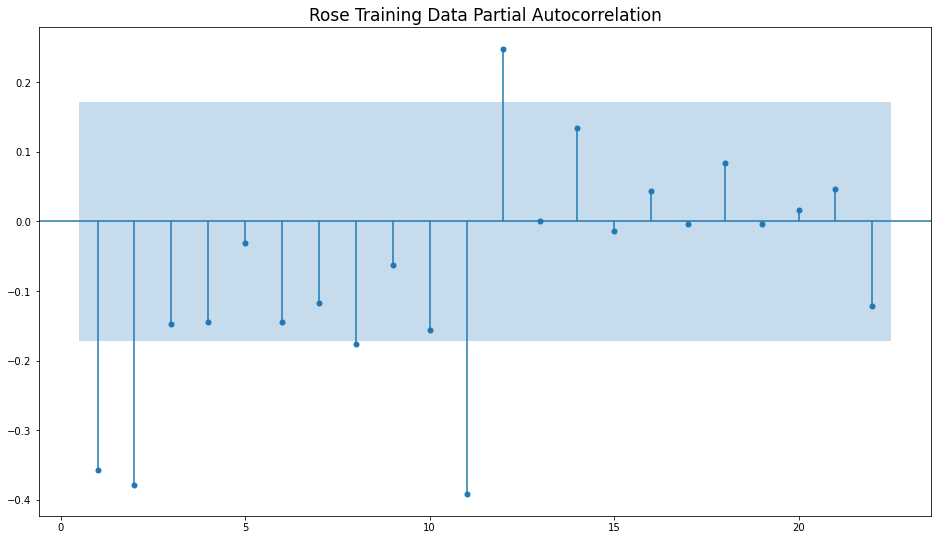

In [230]:
plot_pacf(rtrain.diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Rose Training Data Partial Autocorrelation',fontsize=17)
plt.savefig('rose_train_pacf.jpg', bbox_inches='tight');



Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off

By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [231]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sat, 30 Jul 2022   AIC                           1281.871
Time:                        17:40:04   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

Let us analyse the residuals from the various diagnostics plot.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


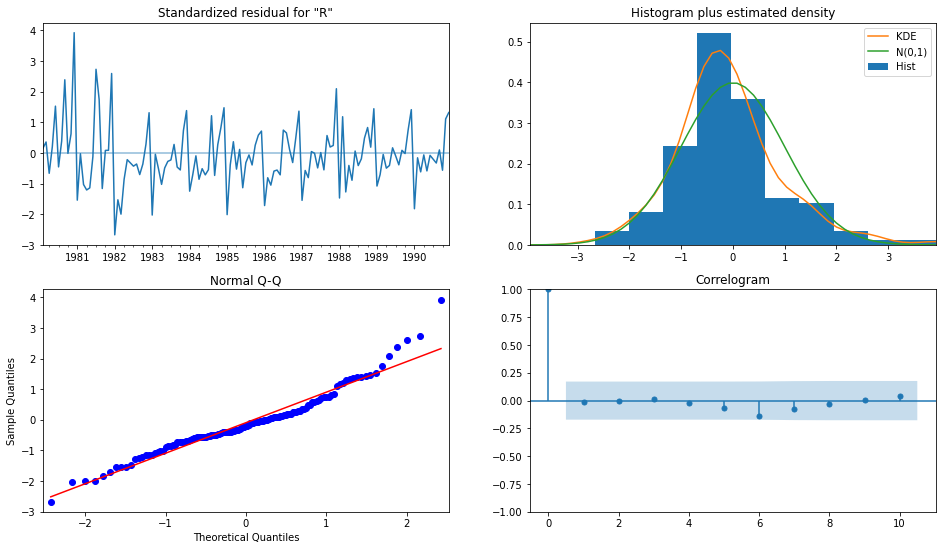

In [232]:
results_manual_ARIMA.plot_diagnostics();
plt.savefig('rose_train_manual_diag_plot.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [233]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [234]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.87119662052946 
MAPE: 76.05621271971843


In [235]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsR2 = pd.concat([resultsR0,temp_resultsR2])

resultsR2

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.812984       75.838991
ARIMA(2,1,2)       36.871197       76.056213

In [236]:
resultsR0 = resultsR2.copy()
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.812984       75.838991
ARIMA(2,1,2)       36.871197       76.056213

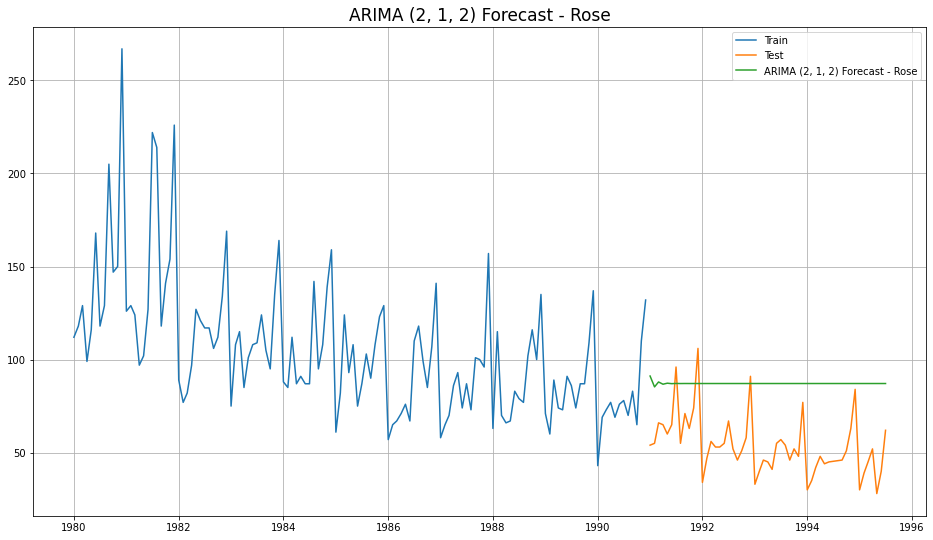

In [237]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)
plt.savefig('rose_arima_manual_forecast.jpg', bbox_inches='tight');

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - ROSE DATA

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

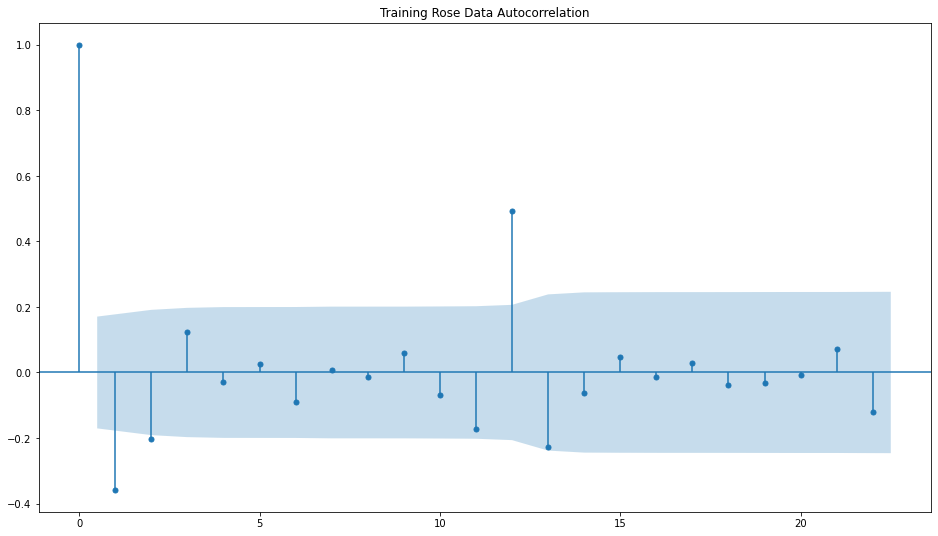

In [238]:
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [239]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [240]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [241]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:5718.421796606624
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753448
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3923.111981743881


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945653


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3735.47970250528
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.748270265051
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127558


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3463.5988181011626
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.631404938387


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:5697.443976122974
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094548
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483293343


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3779.901223324475
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461666
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988256216015


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3709.9417322302766
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.588976478365
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.484493162141
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269379617


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3695.7078636456276
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054104
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264913
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617699


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:5274.882125362548
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413673
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.540093355627
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913581822


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2500.5105450231245
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257978
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545034652
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679584


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2563.981616133711
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189375205
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080533189
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.520652826136


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2666.3931438665522
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739152
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646079987
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380713


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:5125.203630829177
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212232
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212936157
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340468
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3804.225429137994
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987096
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996896724
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788249415


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3605.2986576627577
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124771223
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772338811
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150752298563


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3642.462844594013
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585719
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.940539125769


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:5776.225563773753
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680458
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055024756
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948193


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3611.083522911877
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664119
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661067
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071328


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3544.9005448954404
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272586
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573468
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086833714


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3530.49919829007
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255505
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.317270864085
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.086222406386


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:5143.155178182782
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965032806
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135129
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428503279
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3885.4831308765374
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.924906084468
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470745
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.672579593691
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3815.529185431417
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439386802
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447855586
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.811385029159
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3801.305225834893
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706236
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928100865
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.493840271503


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:5691.958795261579
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760922493494
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183220083724
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318500508657


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3771.2890404795453
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690197403764
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827986624
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.902849369327


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3701.427574717762
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.007380246502
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312805560863
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390249251345


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3688.8329148727094
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316496
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.984973917893
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105124817


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:5542.087568167045
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487676177
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950927105722
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291501883


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2675.583928286201
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687609711808
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955658842624
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886590070266
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3612.6634118577945
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903135001575
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310140930992
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467947378354


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2802.1057393772394
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471139
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.079320882996


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:5765.765302128545
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575974
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.786319864115
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165558947
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3925.340480882403
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645396
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384721
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280806
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3856.384337921692
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.053640740921
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637903399
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191372294


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4036.928628093844
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231797984
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949367
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472071411


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:5766.882547119737
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101342
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471204804
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822729
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3887.483130874628
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608119215
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.639956536955
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866286772


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3023.3509150271693
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.393260025772
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259064494
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598886524745


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3778.082117738038
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146685
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259821
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311108079


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:5693.447859540391
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713704332
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354771824
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488809099


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3544.171182936432
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441348852
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889114674
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687981961567


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3363.247345298559
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712451123
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035240284
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640482420575


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3448.586951281936
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8700952681038
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073335028844
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349329441934


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:5543.753223984078
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563236091426
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.046196912473
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483346398198


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3791.940434772261
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301555346
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328123179304
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191801415338


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3712.1478947283126
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.407420812777
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101471700199
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452503916601


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3682.321753088024
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042212
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118005
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:5766.362730374765
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.546845672638
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726783845
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.686599630471
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3929.1119817438826
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197914127
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976507
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.043881647289
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3858.38433791898
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527213
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167662588
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017225135


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3663.4959139908783
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709434
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641212364
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547116


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:5911.805300015063
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.61491365135
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837553975168
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384298
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3889.4831308745534
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.320445989856
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.327920853833
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523267522


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3515.384216943545
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990286204
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300778068
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002852238873


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3915.3936297312184
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652484905
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401266596
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980111823309


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3755.5226470983303
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211372457
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260532411327
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875105233226


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:4032.940587702241
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3182497694606
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441364618
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1431082346437


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:4711.656428387589
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505640849973
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462137736811
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809344347368
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3912.7267296416185
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385827869794
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.53976435309
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.33401583708


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:5616.149196632079
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8458967463102
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380406678
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483664933341


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3543.040328958739
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711763861
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217100767557
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595714977788


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3695.3866332522175
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184909056
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690408935078
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316168676531
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3680.734077317536


In [242]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400285
238  (3, 1, 2)  (3, 0, 2, 12)  774.880934
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [243]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sat, 30 Jul 2022   AIC                            774.400
Time:                                         17:55:21   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


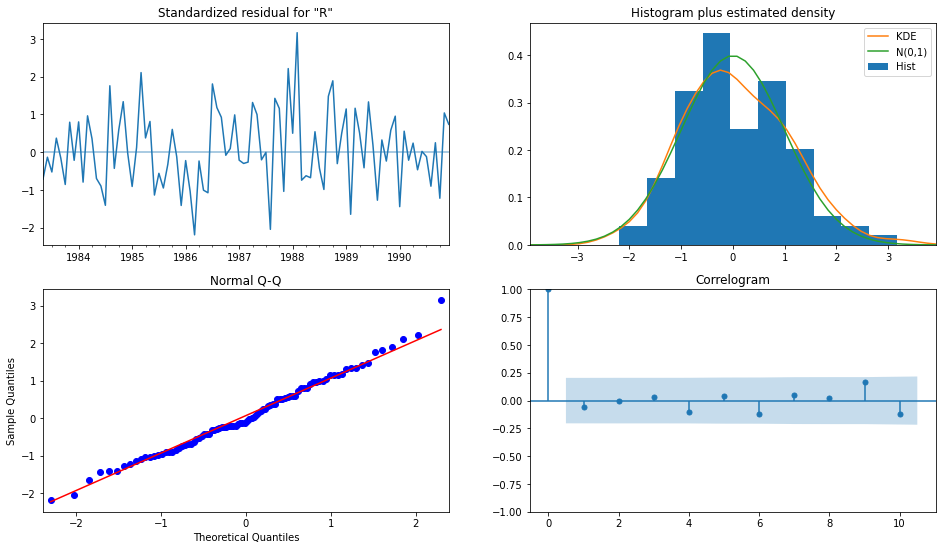

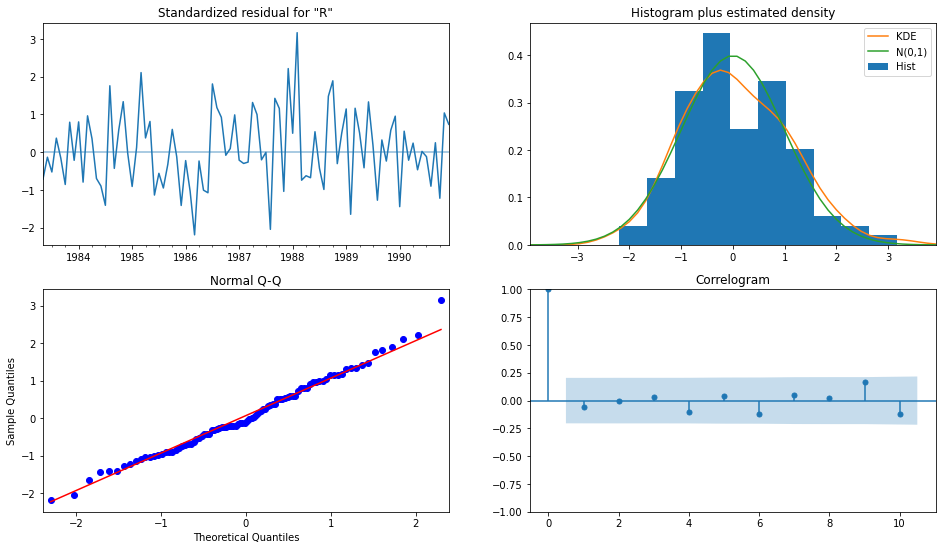

In [244]:
results_auto_SARIMA.plot_diagnostics();
plt.savefig('rose_sarima_auto_30212_diag_plot.jpg', bbox_inches='tight')

## Predict on the Test Set using this model and evaluate the model.

In [245]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [246]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  55.235168  13.907696      27.976585      82.493751
1991-02-01  68.122949  13.991137      40.700825      95.545073
1991-03-01  67.908680  14.012187      40.445299      95.372062
1991-04-01  66.786167  14.099497      39.151660      94.420673
1991-05-01  69.760116  14.108856      42.107266      97.412965

In [247]:
predicted_auto_SARIMA1

In [248]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.881909633560873 
MAPE: 36.37542818554386


In [249]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])


resultsDf = pd.concat([resultsR0,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.812984       75.838991
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881910       36.375428

In [250]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_auto_sarima.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.812984       75.838991
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881910       36.375428

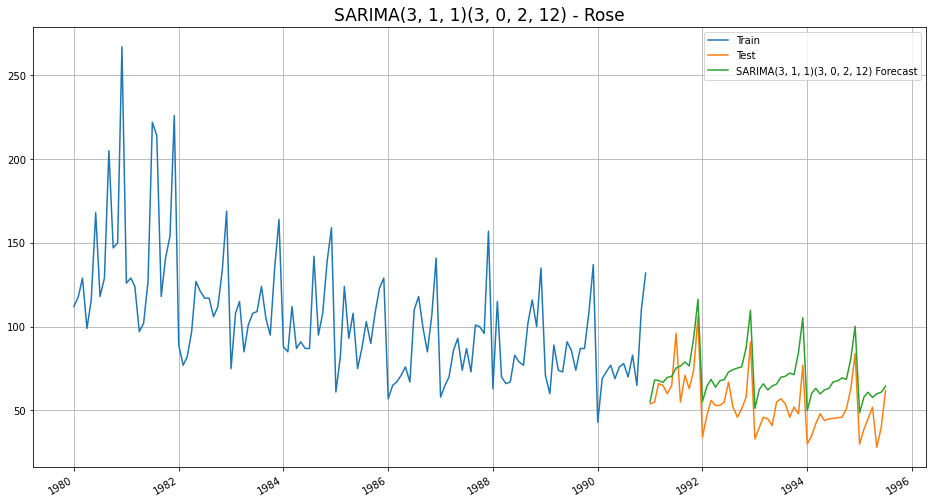

In [251]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);

plt.savefig('rose_sarima_auto_30212.jpg', bbox_inches='tight');

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

Let us look at the ACF and the PACF plots once more.

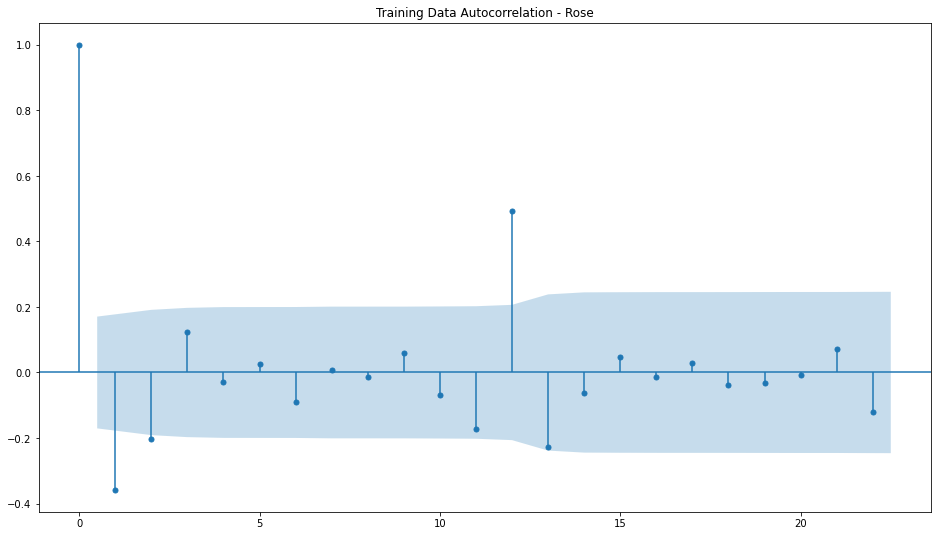

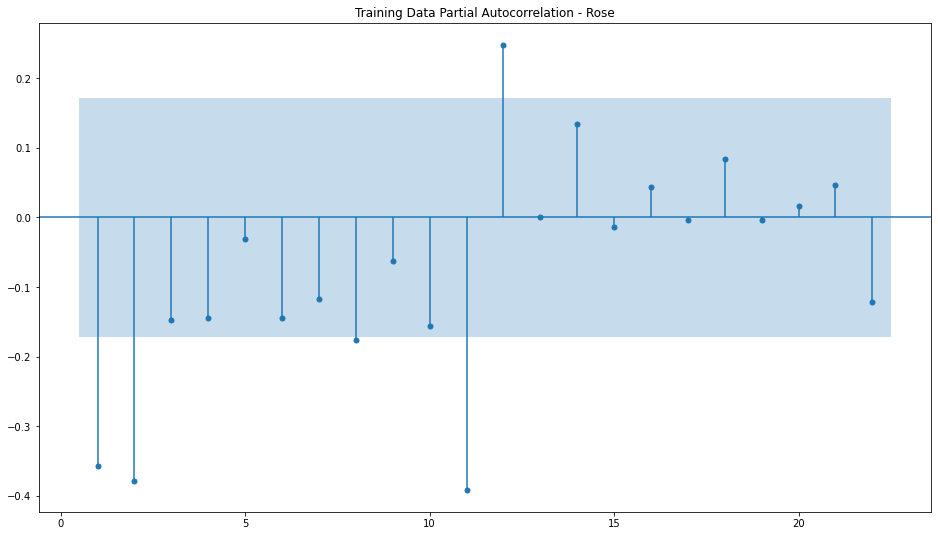

In [252]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12
We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.



In [253]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sat, 30 Jul 2022   AIC                            776.996
Time:                                    17:55:36   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [254]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sat, 30 Jul 2022   AIC                            689.786
Time:                                    17:56:04   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.392
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7093      0.403      1.760      0.078      -0.081       1.499
ar.L2         -0.1501      0.176   

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


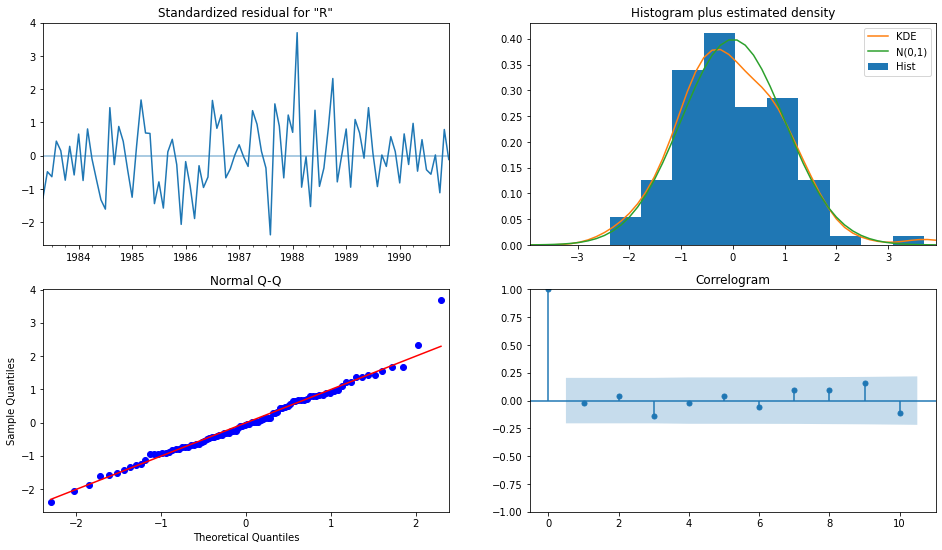

In [255]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('rose_sarima_21212.jpg', bbox_inches='tight');

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


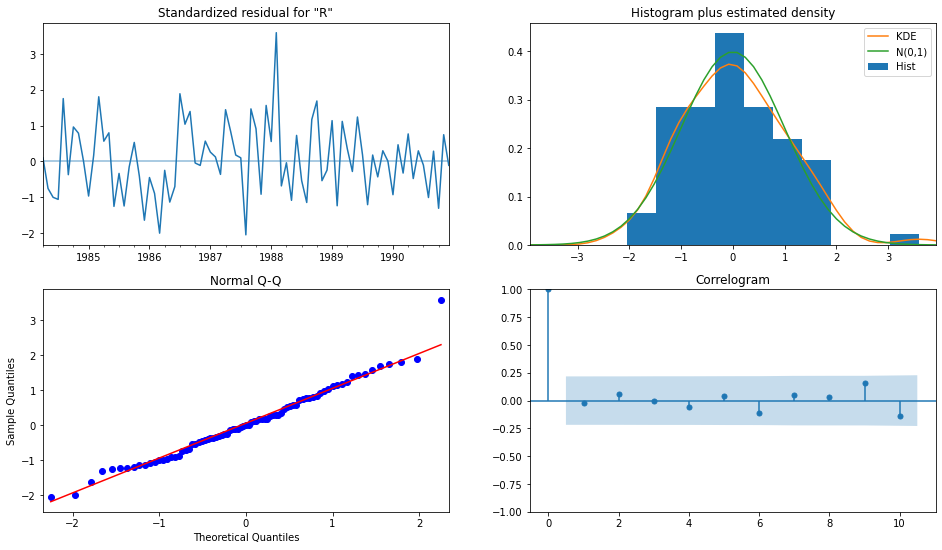

In [256]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('rose_sarima_31212.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [257]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [258]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.550894375564567 
MAPE: 25.47753761782553


In [259]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.356802437391567 
MAPE: 22.954785662823404


In [260]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.812984       75.838991
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881910       36.375428
SARIMA(2,1,2)(3,1,2,12)            15.356802       22.954786

In [261]:
resultsR0 = resultsDf.copy()

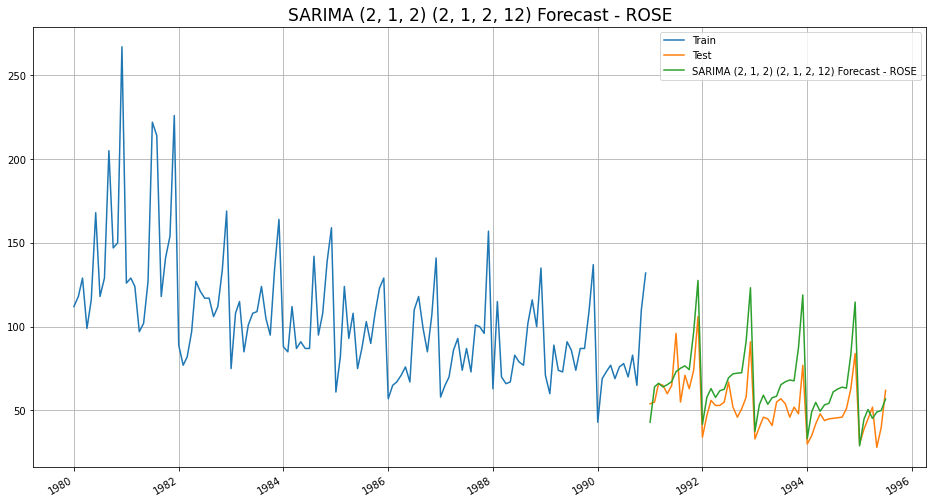

In [262]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast.jpg', bbox_inches='tight');

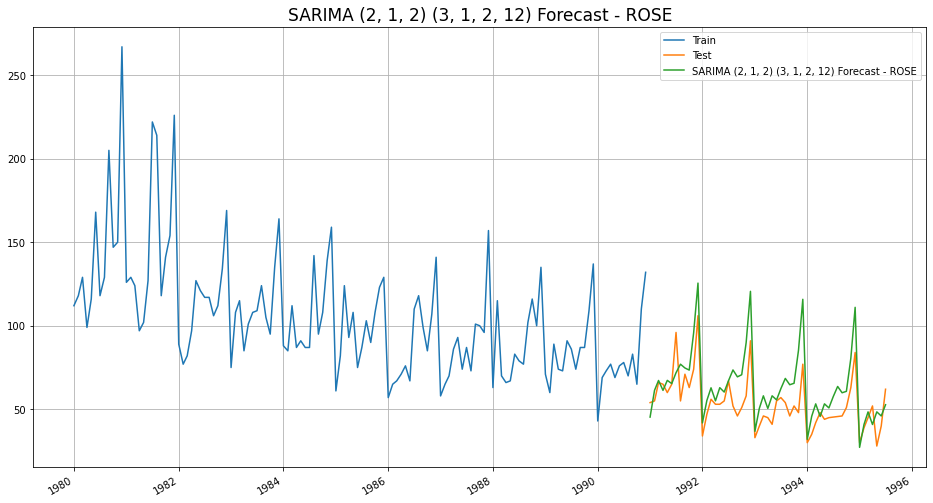

In [263]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast1.jpg', bbox_inches='tight');

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [264]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sat, 30 Jul 2022   AIC                           1193.062
Time:                                    17:56:23   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.559      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

## Evaluate the model on the whole data and predict 12 months into the future

In [265]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [266]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083658  12.674047      18.242983      67.924333
1995-09-01  43.341993  12.959866      17.941122      68.742864
1995-10-01  45.827548  12.963865      20.418839      71.236258
1995-11-01  57.397321  13.124632      31.673516      83.121126
1995-12-01  85.074835  13.133466      59.333714     110.815955

In [267]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91110673976319


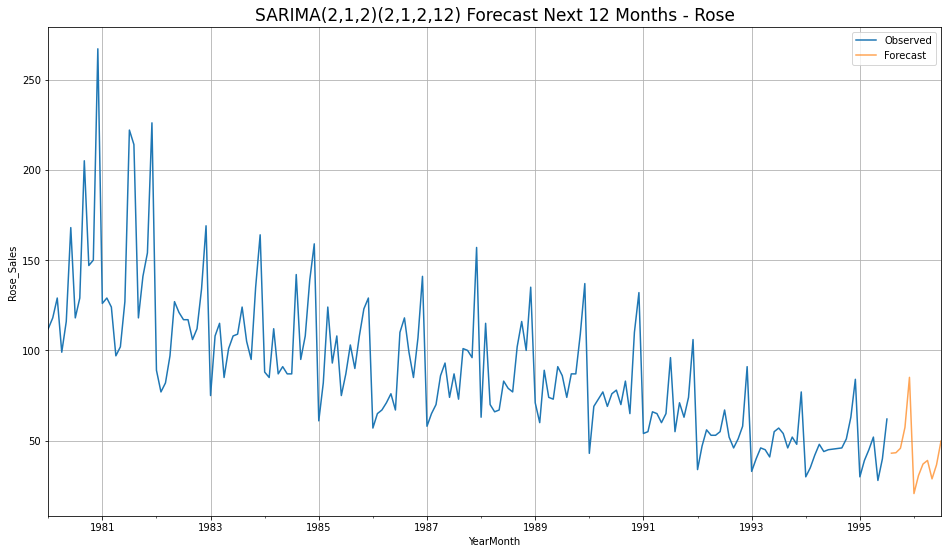

In [268]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [269]:
resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.812984       75.838991
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881910       36.375428
SARIMA(2,1,2)(3,1,2,12)            15.356802       22.954786

In [270]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_all_arima.csv')

In [271]:
results_rose = pd.concat([resultsDf14, resultsR0], axis=0)
results_rose

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268944   
Triple Exponential Smoothing (Additive Season)           14.249661   
Triple Exponential Smoothing (Multiplicative Se...       20.156763   
Triple Exponential Smoothing (Additive Season, ...       26.360083   
Triple Exponential Smoothing (Multiplicative Se...       25.955974   
ARIMA(2,1,3)                                             36.812984   
ARIMA(2,1,2)                                             36.871197   
SARIMA(3, 1, 1)(3, 0, 2, 12)                             18.881910   
SARIMA(2,1,2)(3,1,2,12)                                  15.356802   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.008384   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.951023   
Triple Exponential Smoothing (Multiplicative Se...           404.286809   
Triple Exponential Smoothing (Additive Season, ...           378.951023   
Triple Exponential Smoothing (Multiplicative Se...           352.439828   
ARIMA(2,1,3)                                                        NaN   
ARIMA(2,1,2)                                                        NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                                        NaN   
SARIMA(2,1,2)(3,1,2,12)                                             NaN   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
Triple Exponential Smoothing (Additive Season, ...             NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             75.838991  
ARIMA(2,1,2)                                             76.056213  
SARIMA(3, 1, 1)(3, 0, 2, 12)                             36.375428  
SARIMA(2,1,2)(3,1,2,12)                                  22.954786

In [272]:
results_rose.sort_values(by=['Test RMSE Rose']).to_csv('results_rose.csv')

In [273]:
resultsDf.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  Test MAPE Rose
SARIMA(2,1,2)(3,1,2,12)            15.356802       22.954786
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881910       36.375428
ARIMA(2,1,3)                       36.812984       75.838991
ARIMA(2,1,2)                       36.871197       76.056213

# =================================================================

## ARIMA / SARIMA Modelling on SPARKLING dataset

### Check for stationarity of the Training Data - Sparkling

Let us plot the training data once.

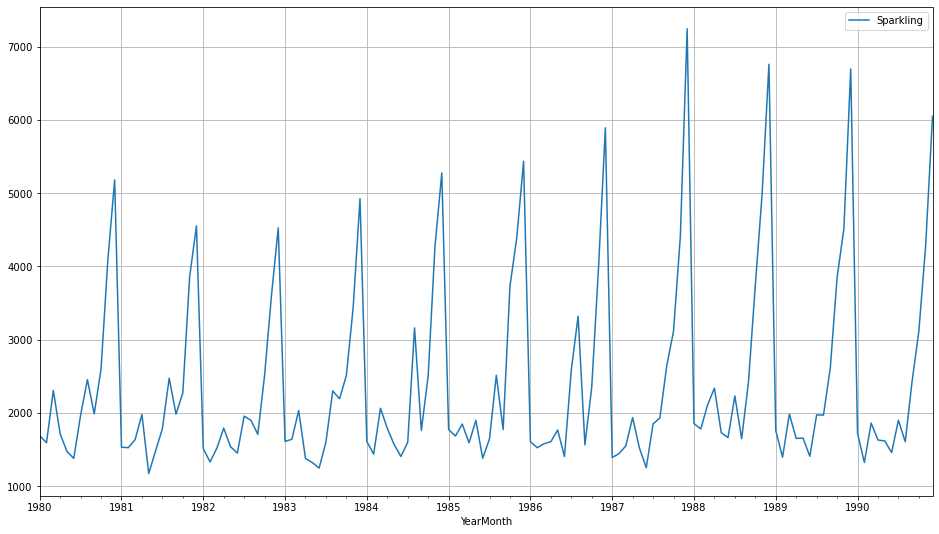

In [274]:
strain.plot(grid=True);

In [275]:
dftest = adfuller(strain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593658
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [276]:
dftest = adfuller(strain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655515133e-11
Number of lags used 11


Training data is now Stationary
Now, let us go ahead and plot the differenced training data.

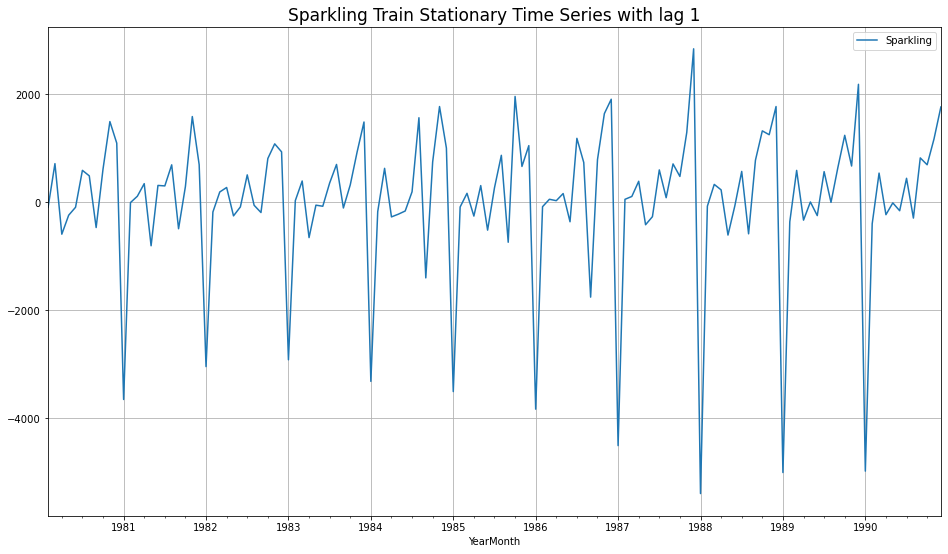

In [277]:
strain.diff().dropna().plot(grid=True);
plt.title('Sparkling Train Stationary Time Series with lag 1', fontsize=17);
plt.savefig('spark_train_stationary.jpg', bbox_inches='tight');

In [278]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But we'll check least AIC of ARIMA and then SARIMA

In [279]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [280]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [281]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(strain['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(0, 1, 3) - AIC:2233.9948577793975
ARIMA(1, 1, 0) - AIC:2266.6085393190087


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.5272004508324
ARIMA(1, 1, 3) - AIC:2235.6078073353247
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122831566


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.9370761971877
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498924009065


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.952332594816
ARIMA(3, 1, 3) - AIC:2221.458954306803


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [282]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.458954
14  (3, 1, 2)  2230.952333
11  (2, 1, 3)  2232.937076
9   (2, 1, 1)  2233.777626

In [283]:
auto_ARIMA = ARIMA(strain, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 30 Jul 2022   AIC                           2213.509
Time:                        17:56:35   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

### Diagnostics plot - Sparkling

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


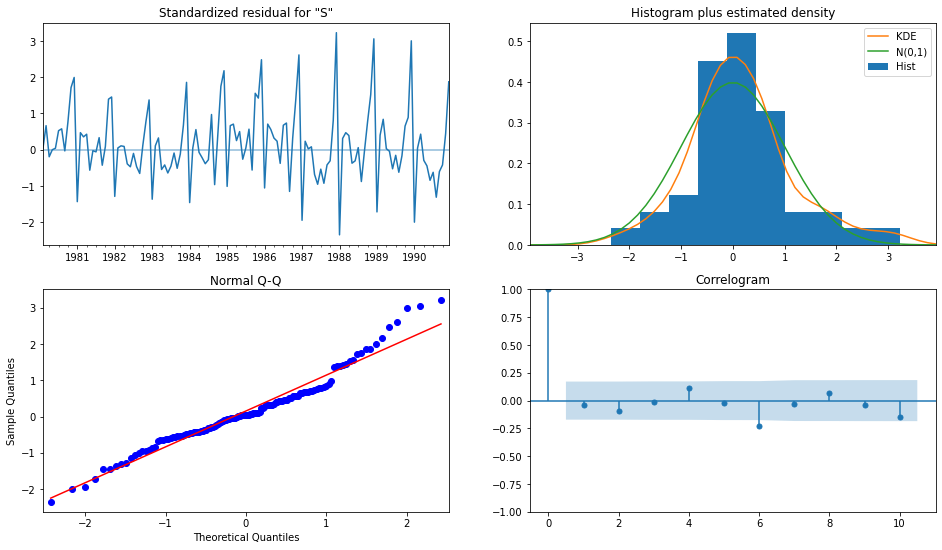

In [284]:
results_auto_ARIMA.plot_diagnostics();
plt.savefig('spark_arima_diag_plot.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [285]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

In [286]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [287]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9796397916396 
MAPE: 47.09998646565863


In [288]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf.to_csv('spark_arima_auto_212.csv')
resultsDf

RMSE       MAPE
ARIMA(2,1,2)  1299.97964  47.099986

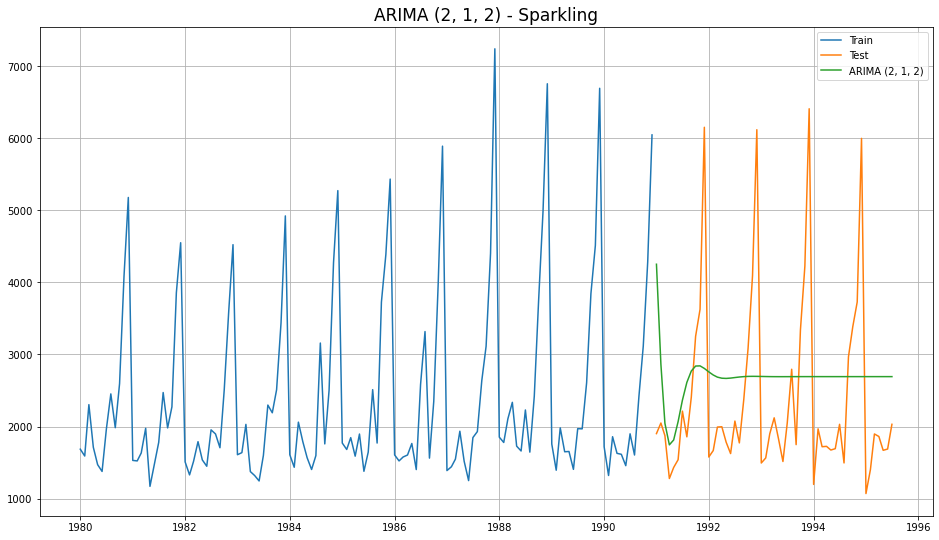

In [289]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best')

plt.savefig('spark_arima_auto_212.jpg', bbox_inches='tight');

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots - SPARKLING

Let us look at the ACF and the PACF plots once more.

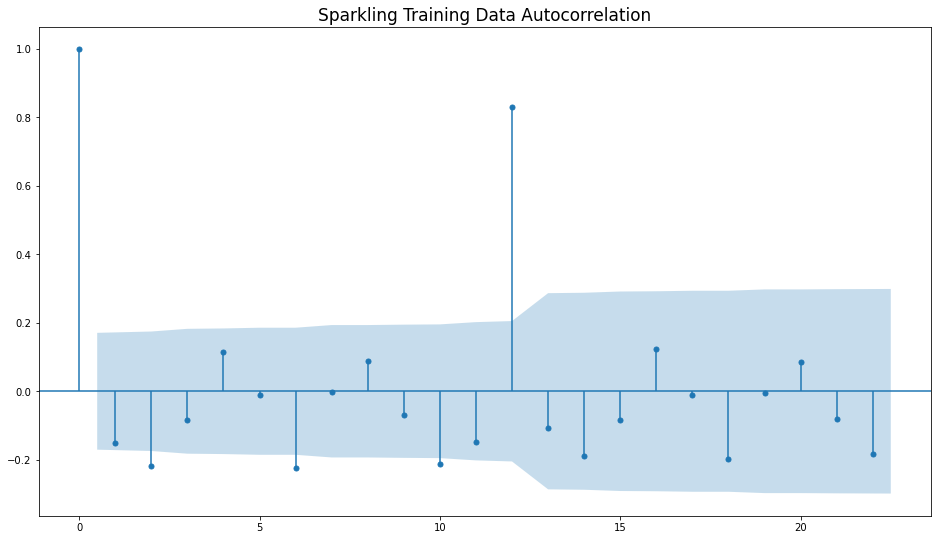

In [290]:
plot_acf(strain.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)
plt.savefig('spark_train_acf.jpg', bbox_inches='tight');



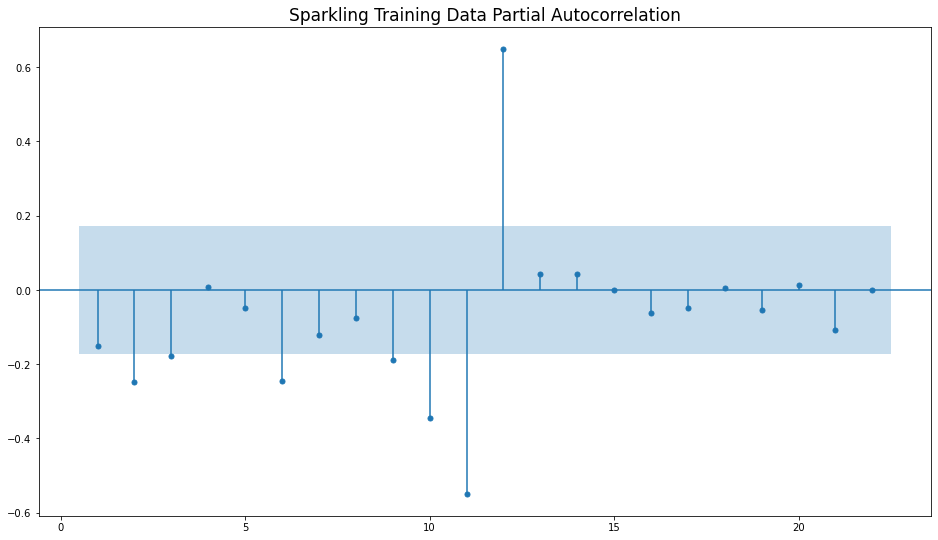

In [291]:
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation', fontsize=17)
plt.savefig('spark_train_pacf.jpg', bbox_inches='tight');



By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

In [292]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sat, 30 Jul 2022   AIC                           2267.663
Time:                        17:56:41   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Let us analyse the residuals from the various diagnostics plot.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


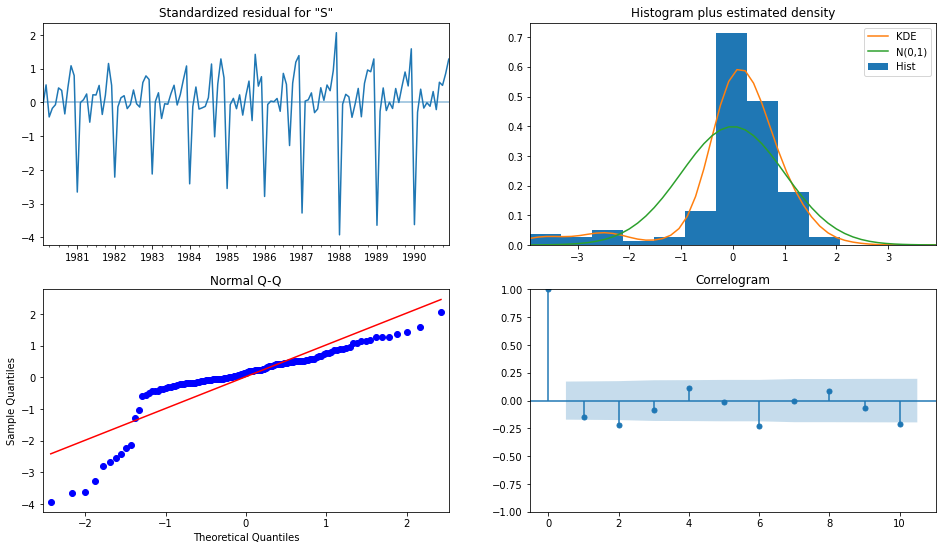

In [293]:
results_manual_ARIMA.plot_diagnostics();

plt.savefig('spark_train_diag_plot.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [294]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))

In [295]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [296]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)  1299.979640   47.099986
ARIMA(0,1,0)  3864.279352  201.327650

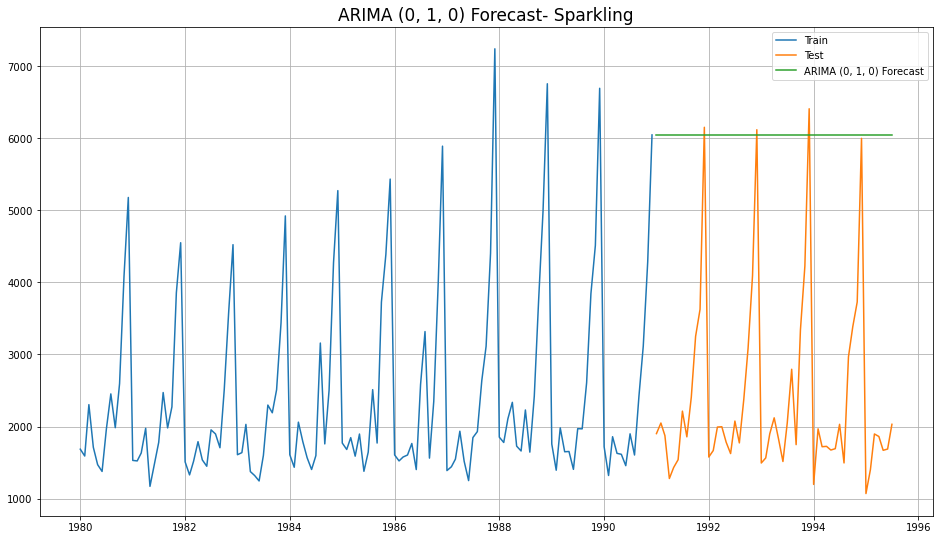

In [297]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)
plt.savefig('spark_manual_arima_010.jpg', bbox_inches='tight');

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

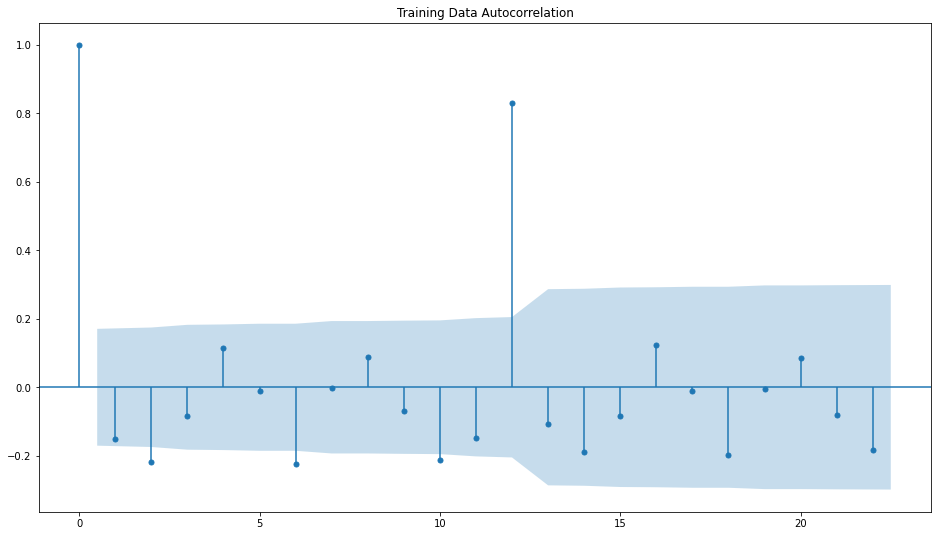

In [298]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [299]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [300]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [301]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236566
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7441.156431906364
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791705


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3742.8762259298555
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611443
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920801


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3758.958561092017
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625834
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064452


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:2950.5228823053444
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956687
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957288972
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:7427.391419134551
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838032
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319373017
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319652484135


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3331.05595273182
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176586
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245088165164
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824161124


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3241.9959796934704
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679619144
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727992280667
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891886236814


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:2995.3213080002365
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687017
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007202285
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890857088
SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:7347.317280185878
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332162715
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675077971956
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605067006255


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3938.088166932179
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774499593
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438800921174
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215638902927


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3857.162431208421
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993407932522
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.744837028555
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.688384899653


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3617.622709361831
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.092540844011
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770693356252
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973661923838
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:591.1117678489732
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0334299520393
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404077735428
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.741913617997


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2626.7375784310925
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580710682
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.067481435255
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0488938127012


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3451.5880161528557
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529524943044
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435178778709
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.154494292433


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3412.8662753379513
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339903718
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476353958
SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:7508.163889427939
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330933
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592679392
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402563907


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3555.1938106034963
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129133
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.135613205786
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067533707


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3481.3086478493615
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640376368
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780407414
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660398747391


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3203.7736456919283
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154559
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.35589741287
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352633835
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:7424.53357152912
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466615247
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7167467829483
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863678778
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3413.5444467492816
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606872656
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3140614367558
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968622262
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3319.192874932727
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.911207417571
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.950247884626
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.090353111238
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3098.728764144143
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450504807
SARIMA(1, 1, 2)x(0, 

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4185.481880780128
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216931923386
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5152937655243
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.934563221006


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4103.964224375064
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.810239456891
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.914697516345
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9662802685204


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3865.2890028100933
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.0264039780336
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381452188634
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5176837981328
SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596978341
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554889971912
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744599763357


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3184.778567946933
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4151893371716
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668979046543
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292699439532


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3103.6076696947093
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.772333087003
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509686179014
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649207134984


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3044.485889144129
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435408604
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039835
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:7504.526807024466
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066059465
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.935734715416
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204110845
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3733.282356696875
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464860076
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344991504284
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191733905218


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3557.080587566543
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728030847
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017619518007
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975650234044
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3369.996863540077
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145789
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495219829
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408032862
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:7424.346020440857
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234291874323
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911276667364
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.988828061324


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2731.9211401178763
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506089688
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595857703485
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428646174457


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3607.9267130327803
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.467332720137
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221326617342
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.824132853828


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2847.3697975701025
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681149359595
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372612883312
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432239847
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:7350.942466338702
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931211306
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6005734246855
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404034075916


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3412.6127364839986
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1625.2273641149545
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476069401338
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401475884189
SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3406.2304224589247
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376141123864
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.4884304516163
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4358918669234


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3154.8930575485356
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.039589108596
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.0410432018382
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.707328107143
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:7263.081927022511
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.8356645433632
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1710.824208435579
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.5079085580637


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3586.726308423444
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6981518378466
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1571.4572893363131
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9976735284615
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3539.969055879002
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898821941828
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1403.992281023903
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.2763499437588
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3303.910912354879
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291418885
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923146286
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:7503.735447062872
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703274
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.378384205454
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471968012607


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3306.8073333810903
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.27480255634
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812875376
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.680819720218


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3610.174053381316
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620393057
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774705934604
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3074705673787


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3038.0628247948357
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.2220983380475
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.97330788117
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234050495345
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:7426.749958295574
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222526152523
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.100918660355
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6844977639496


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:2733.9199130511047
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505375862
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2956627515046
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.349814542869
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3572.2358085685387
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.788331400711
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.681485920893
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1959009786774
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3337.953886221875
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147271657413
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1888.5089092422784
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255057873586
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:7351.329197535243
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1748.2283641599342
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.5806926987775
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.4364174668303


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3647.0003029603067
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.946488568598
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894288592279
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8054093517112
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3578.628056495706
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1400.7123732421246
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.60261632726
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7144833728041
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3329.3633587642503
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.774954204572
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1874.7818279278051
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7829863223199
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:7259.955017860645
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1749.2988259842039
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.2985239960333
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3935687200108
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2641.1931692800276
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1569.1444581414062
SARIMA(3, 1, 3)x

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3412.805514997973
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.49701389597
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1698606333773
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6926034967883


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2883.1799929239264


In [302]:
SARIMA_AIC.sort_values(by=['AIC']).head(40)

param       seasonal          AIC
115  (1, 1, 3)  (0, 0, 3, 12)    16.000000
51   (0, 1, 3)  (0, 0, 3, 12)   591.111768
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497014
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602616
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681486
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195901
238  (3, 1, 2)  (3, 0, 2, 12)  1389.714483
254  (3, 1, 3)  (3, 0, 2, 12)  1391.692603
253  (3, 1, 3)  (3, 0, 1, 12)  1393.169861
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862
205  (3, 1, 0)  (3, 0, 1, 12)  1397.677471
206  (3, 1, 0)  (3, 0, 2, 12)  1398.307471
188  (2, 1, 3)  (3, 0, 0, 12)  1399.789882
236  (3, 1, 2)  (3, 0, 0, 12)  1400.712373
190  (2, 1, 3)  (3, 0, 2, 12)  1401.276350
172  (2, 1, 2)  (3, 0, 0, 12)  1401.437614
156  (2, 1, 1)  (3, 0, 0, 12)  1402.467333
173  (2, 1, 2)  (3, 0, 1, 12)  1402.488430
157  (2, 1, 1)  (3, 0, 1, 12)  1403.122133
174  (2, 1, 2)  (3, 0, 2, 12)  1403.435892
158  (2, 1, 1)  (3, 0, 2, 12)  1403.824133
189  (2, 1, 3)  (3, 0, 1, 12)  1403.992281
140  (2, 1, 0)  (3, 0, 0, 12)  1411.944973
141  (2, 1, 0)  (3, 0, 1, 12)  1413.101762
108  (1, 1, 2)  (3, 0, 0, 12)  1413.810239
142  (2, 1, 0)  (3, 0, 2, 12)  1414.197565
92   (1, 1, 1)  (3, 0, 0, 12)  1414.911207
109  (1, 1, 2)  (3, 0, 1, 12)  1414.914698
124  (1, 1, 3)  (3, 0, 0, 12)  1415.772333
93   (1, 1, 1)  (3, 0, 1, 12)  1415.950248
110  (1, 1, 2)  (3, 0, 2, 12)  1415.966280
125  (1, 1, 3)  (3, 0, 1, 12)  1416.750969
94   (1, 1, 1)  (3, 0, 2, 12)  1417.090353
126  (1, 1, 3)  (3, 0, 2, 12)  1417.764921
28   (0, 1, 1)  (3, 0, 0, 12)  1428.460768
44   (0, 1, 2)  (3, 0, 0, 12)  1428.599341
29   (0, 1, 1)  (3, 0, 1, 12)  1428.872799
30   (0, 1, 1)  (3, 0, 2, 12)  1429.589189
60   (0, 1, 3)  (3, 0, 0, 12)  1429.652952

In [303]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Sat, 30 Jul 2022   AIC                           1387.788
Time:                                     18:25:43   BIC                           1407.963
Sample:                                 01-01-1980   HQIC                          1395.931
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


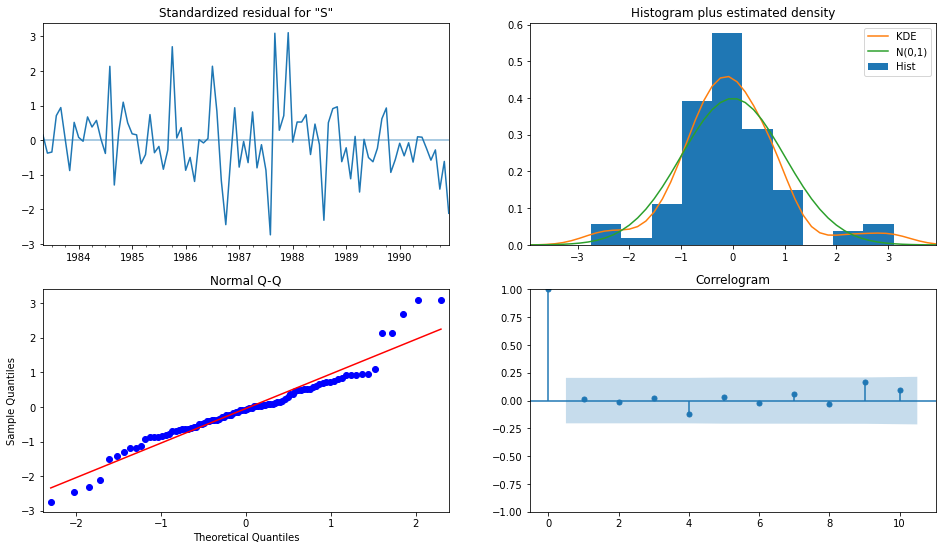

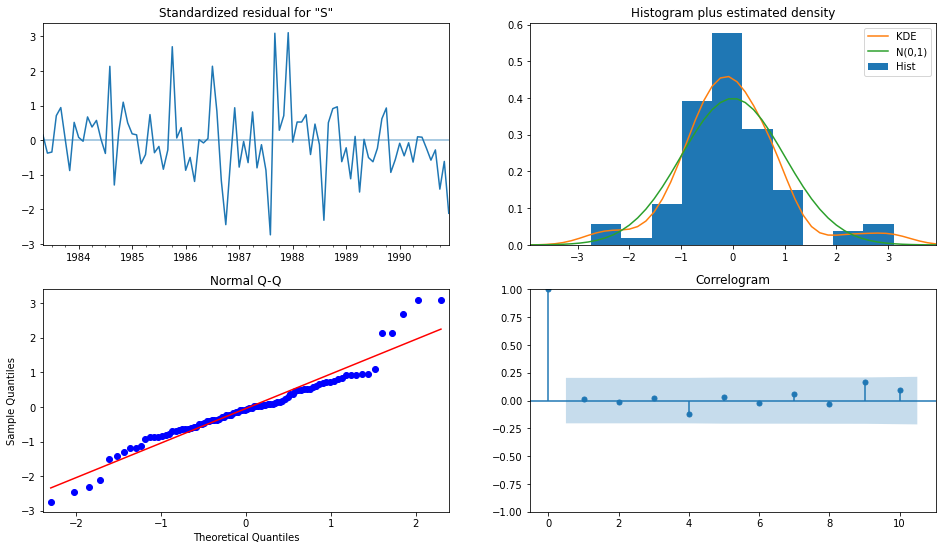

In [304]:
results_auto_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima00312_diag_plot.jpg', bbox_inches='tight');
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [305]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(stest))

In [306]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1389.389859  415.865214     574.309017    2204.470700
1991-02-01  1224.711540  427.867891     386.105884    2063.317196
1991-03-01  1673.368665  428.012396     834.479784    2512.257547
1991-04-01  1533.368647  432.776553     685.142190    2381.595104
1991-05-01  1426.008279  435.889701     571.680164    2280.336393

In [307]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 601.140492165998 
MAPE: 25.865406357555777


In [308]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979640   47.099986
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.140492   25.865406

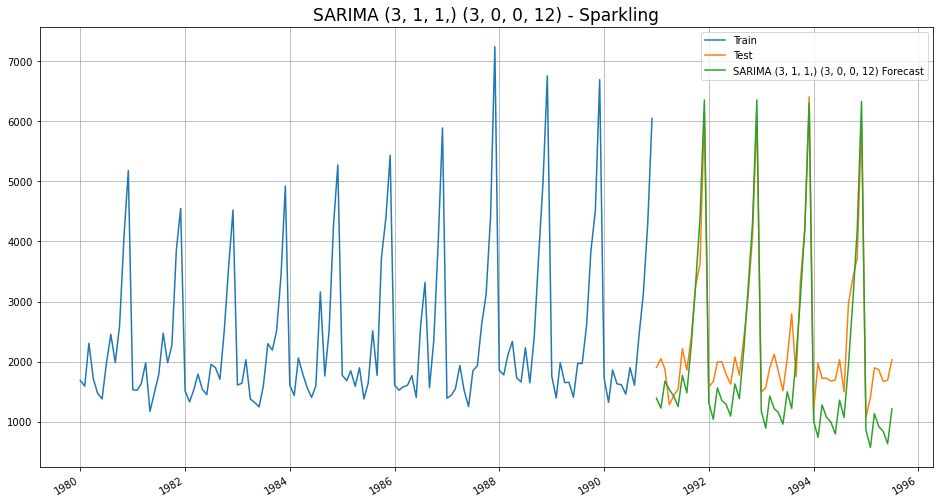

In [309]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 1,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling', fontsize=17);

plt.savefig('spark_sarima_auto_30012.jpg', bbox_inches='tight');

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12 - SPARKLING

Let us look at the ACF and the PACF plots once more.

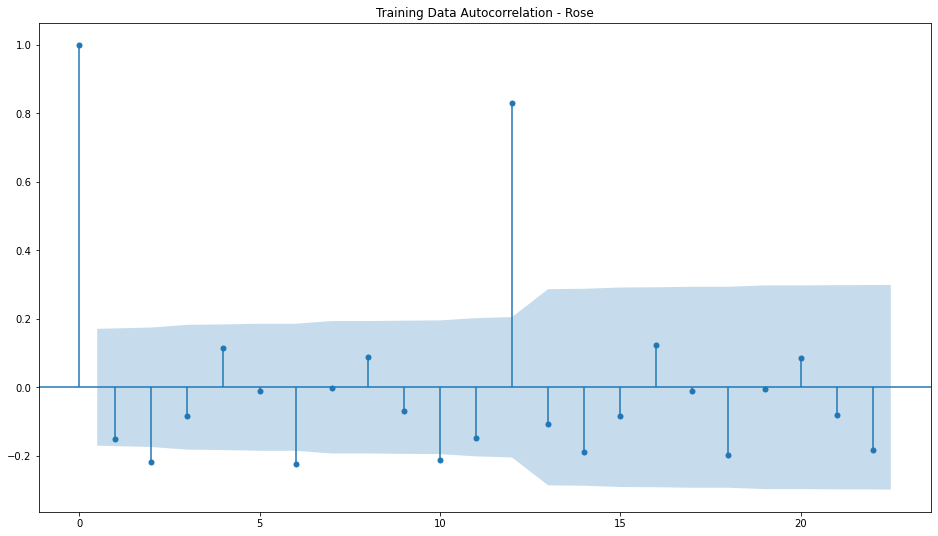

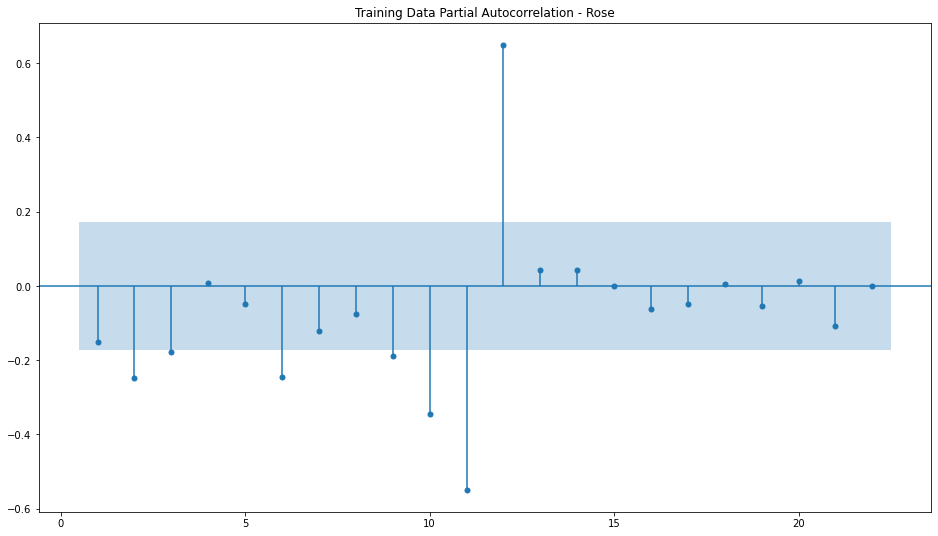

In [310]:
plot_acf(strain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [311]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -811.162
Date:                              Sat, 30 Jul 2022   AIC                           1628.324
Time:                                      18:25:48   BIC                           1636.315
Sample:                                  01-01-1980   HQIC                          1631.563
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1482      0.223      0.664      0.507      -0.289       0.586
ma.S.L12      -0.57

In [312]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Sat, 30 Jul 2022   AIC                           1455.991
Time:                                         18:25:49   BIC                           1468.708
Sample:                                     01-01-1980   HQIC                          1461.128
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

In [313]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Sat, 30 Jul 2022   AIC                           1288.607
Time:                                         18:25:54   BIC                           1303.120
Sample:                                     01-01-1980   HQIC                          1294.438
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


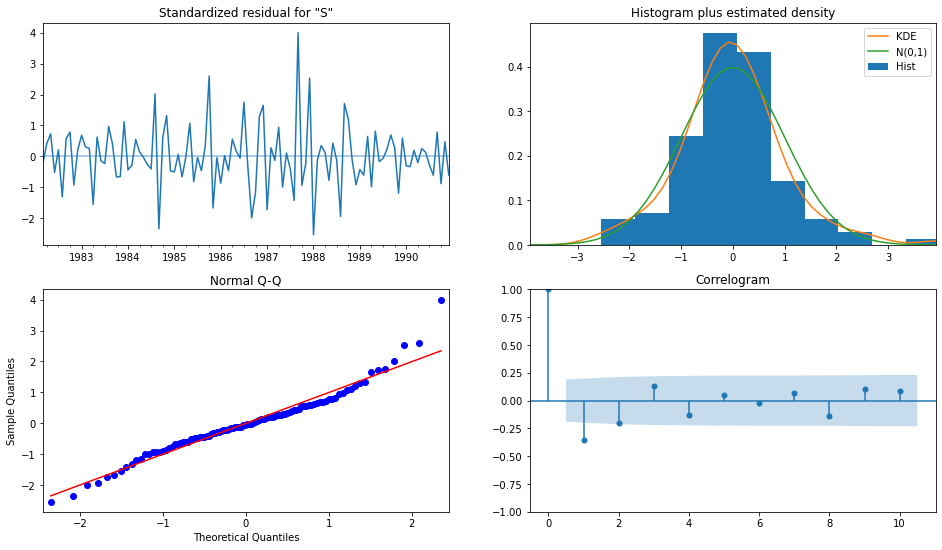

In [314]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima_11112.jpg', bbox_inches='tight');

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


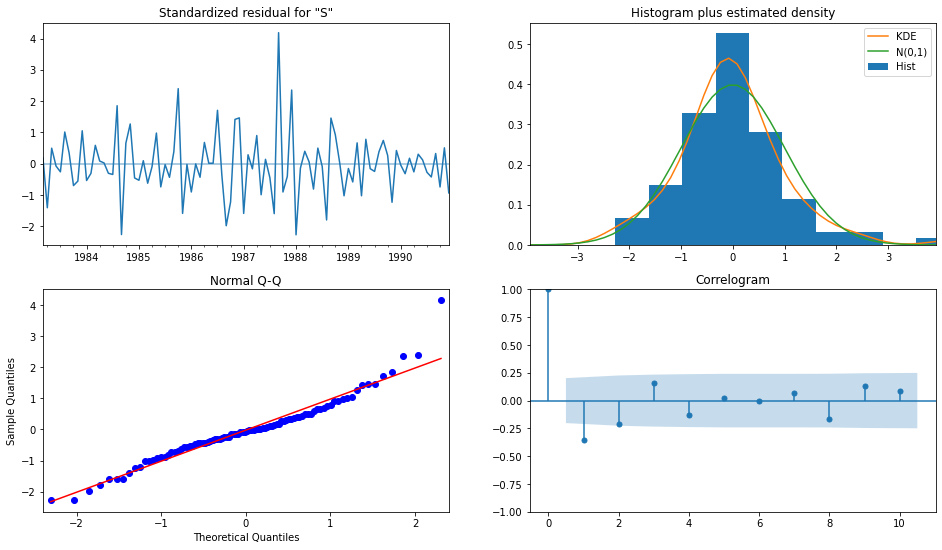

In [315]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('spark_sarima_21212.jpg', bbox_inches='tight');

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


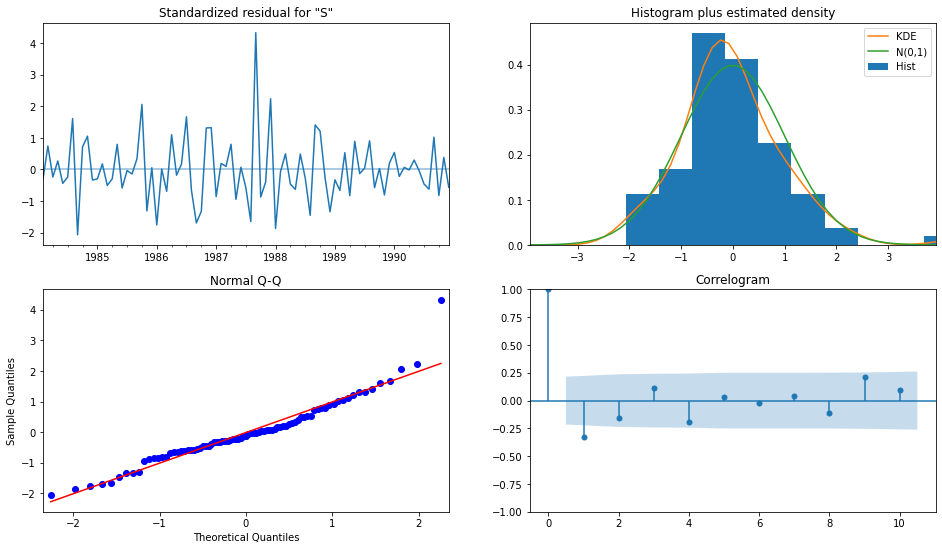

In [316]:
results_manual_SARIMA2.plot_diagnostics()
plt.savefig('spark_sarima_31212.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [317]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(stest))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(stest))

In [318]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1189.8357823772694 
MAPE: 54.872535656986344


In [319]:
rmse1 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1757.7272859540633 
MAPE: 81.7852535944286


In [320]:
rmse2 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 1551.6459420692304 
MAPE: 71.5661806254045


In [321]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979640   47.099986
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.140492   25.865406
SARIMA(0,1,0)(3,1,2,12)  1189.835782   54.872536
SARIMA(0,1,0)(2,1,2,12)  1757.727286   81.785254
SARIMA(0,1,0)(3,1,2,12)  1551.645942   71.566181

In [322]:
resultsR0 = resultsDf.copy()

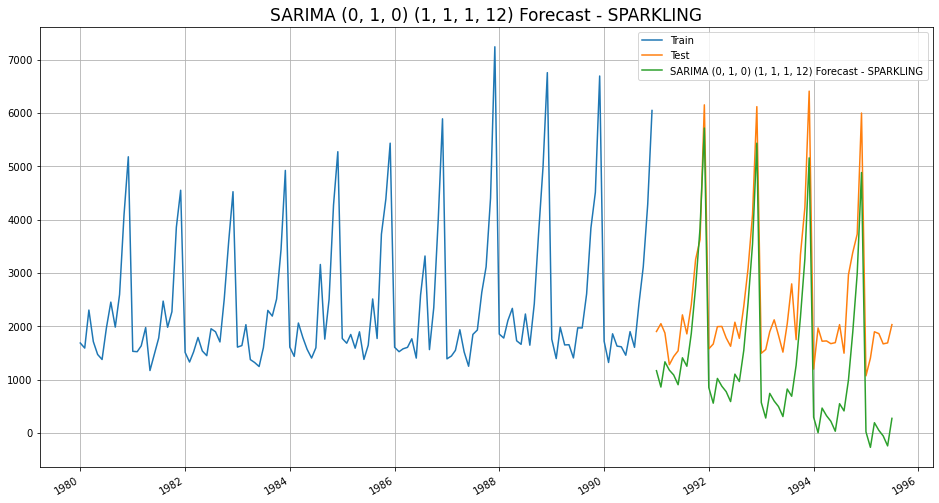

In [323]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('SPARK_sarima_manual_forecast_11112.jpg', bbox_inches='tight');

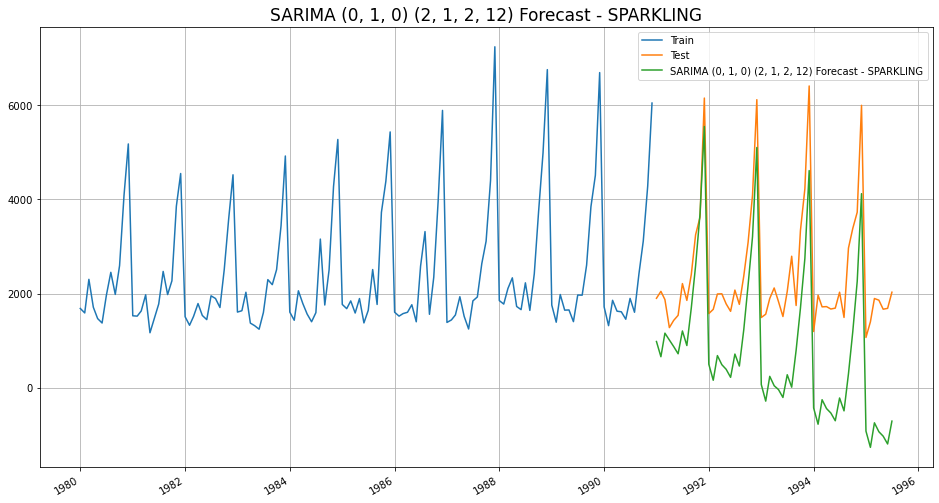

In [324]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast1.jpg', bbox_inches='tight');

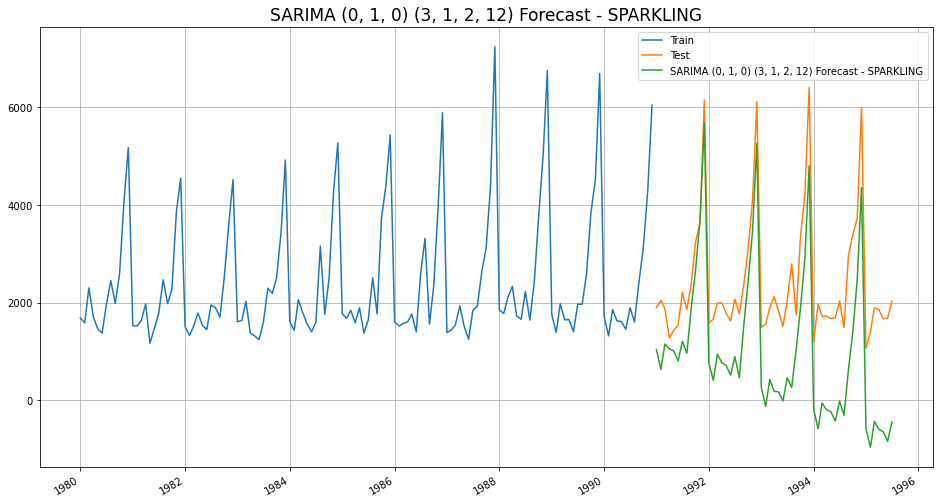

In [325]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA2.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast2.jpg', bbox_inches='tight');

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [326]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sat, 30 Jul 2022   AIC                           1193.062
Time:                                    18:26:12   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.559      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

## Evaluate the model on the whole data and predict 12 months into the future

In [327]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [328]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083658  12.674047      18.242983      67.924333
1995-09-01  43.341993  12.959866      17.941122      68.742864
1995-10-01  45.827548  12.963865      20.418839      71.236258
1995-11-01  57.397321  13.124632      31.673516      83.121126
1995-12-01  85.074835  13.133466      59.333714     110.815955

In [329]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91110673976319


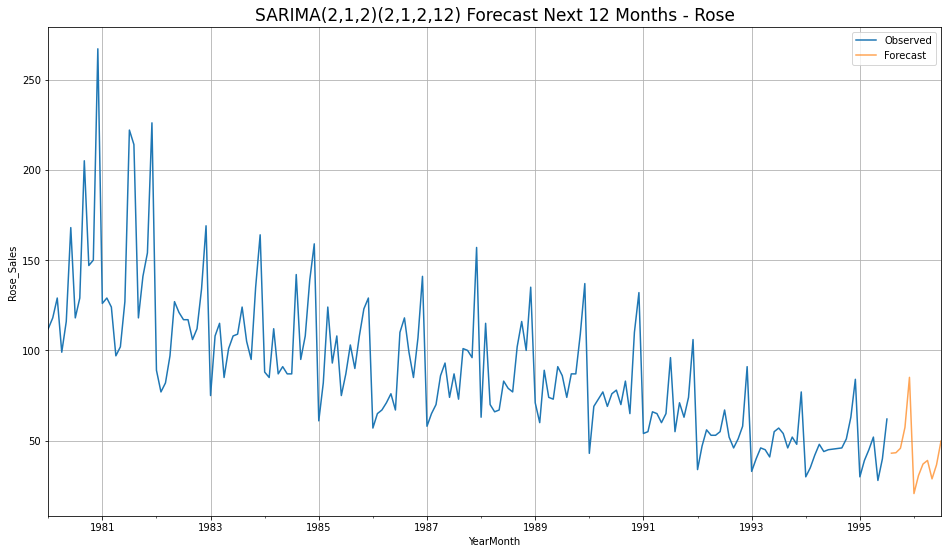

In [330]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [331]:
resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979640   47.099986
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.140492   25.865406
SARIMA(0,1,0)(3,1,2,12)  1189.835782   54.872536
SARIMA(0,1,0)(2,1,2,12)  1757.727286   81.785254
SARIMA(0,1,0)(3,1,2,12)  1551.645942   71.566181

In [332]:
resultsS0 = resultsDf.copy()

resultsS0.to_csv('spark_all_arima.csv')

In [333]:
results_all_spark = pd.concat([resultsDf14, resultsS0], axis=0)
results_all_spark

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268944   
Triple Exponential Smoothing (Additive Season)           14.249661   
Triple Exponential Smoothing (Multiplicative Se...       20.156763   
Triple Exponential Smoothing (Additive Season, ...       26.360083   
Triple Exponential Smoothing (Multiplicative Se...       25.955974   
ARIMA(2,1,2)                                                   NaN   
ARIMA(0,1,0)                                                   NaN   
SARIMA(3,1,1)(3,0,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(0,1,0)(2,1,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.008384   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.951023   
Triple Exponential Smoothing (Multiplicative Se...           404.286809   
Triple Exponential Smoothing (Additive Season, ...           378.951023   
Triple Exponential Smoothing (Multiplicative Se...           352.439828   
ARIMA(2,1,2)                                                        NaN   
ARIMA(0,1,0)                                                        NaN   
SARIMA(3,1,1)(3,0,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(0,1,0)(2,1,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   

                                                           RMSE        MAPE  
RegressionOnTime                                            NaN         NaN  
NaiveModel                                                  NaN         NaN  
SimpleAverageModel                                          NaN         NaN  
2pointTrailingMovingAverage                                 NaN         NaN  
4pointTrailingMovingAverage                                 NaN         NaN  
6pointTrailingMovingAverage                                 NaN         NaN  
9pointTrailingMovingAverage                                 NaN         NaN  
Simple Exponential Smoothing                                NaN         NaN  
Double Exponential Smoothing                                NaN         NaN  
Triple Exponential Smoothing (Additive Season)              NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
Triple Exponential Smoothing (Additive Season, ...          NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
ARIMA(2,1,2)                                        1299.9

In [334]:
results_all_spark.to_csv('results_all_spark.csv')

# <font color=#FF6565> =============================================================================================

# <font color=#FF6565> =============================================================================================

## Best Model for ROSE with Least RMSE - 2 Pt Moving Average

In [335]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [336]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()
MovingAverage.tail()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

Rose  Trailing_2
YearMonth                   
1995-03-01  45.0        42.0
1995-04-01  52.0        48.5
1995-05-01  28.0        40.0
1995-06-01  40.0        34.0
1995-07-01  62.0        51.0

In [337]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']


MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [338]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(start='08/01/1995', periods=12, freq='MS')
ts = pd.to_datetime(datelist, format="%Y-%m-%d")

ma_forecast = pd.DataFrame(columns=['Rose', 'Trailing_2', 'forecast_12'], index=ts)

MovingAverage = pd.concat([MovingAverage, ma_forecast], axis=0)
MovingAverage['forecast_12'] = MovingAverage['Rose'].rolling(2).mean()

In [339]:
MovingAverage.tail()
MovingAverage.shape
MovingAverage.fillna(0)
MovingAverage['Rose'].iloc[0:2]

Rose  Trailing_2  forecast_12
1996-03-01   NaN         NaN          NaN
1996-04-01   NaN         NaN          NaN
1996-05-01   NaN         NaN          NaN
1996-06-01   NaN         NaN          NaN
1996-07-01   NaN         NaN          NaN

(199, 3)

Rose  Trailing_2  forecast_12
1980-01-01  112.0         0.0          0.0
1980-02-01  118.0       115.0        115.0
1980-03-01  129.0       123.5        123.5
1980-04-01   99.0       114.0        114.0
1980-05-01  116.0       107.5        107.5
...           ...         ...          ...
1996-03-01    0.0         0.0          0.0
1996-04-01    0.0         0.0          0.0
1996-05-01    0.0         0.0          0.0
1996-06-01    0.0         0.0          0.0
1996-07-01    0.0         0.0          0.0

[199 rows x 3 columns]

1980-01-01    112.0
1980-02-01    118.0
Name: Rose, dtype: float64

In [340]:
import math
k = 2
yhat = []

for i in range(0,199):
    tmp = 0.0

    tmp = math.fsum(MovingAverage['Rose'].iloc[i:i+2])

    yhat.append(tmp/k)
    
yhat

[115.0,
 123.5,
 114.0,
 107.5,
 142.0,
 143.0,
 123.5,
 167.0,
 176.0,
 148.5,
 208.5,
 196.5,
 127.5,
 126.5,
 110.5,
 99.5,
 114.5,
 174.5,
 218.0,
 166.0,
 129.5,
 147.5,
 190.0,
 157.5,
 83.0,
 79.5,
 89.5,
 112.0,
 124.0,
 119.0,
 117.0,
 111.5,
 109.0,
 123.0,
 151.5,
 122.0,
 91.5,
 111.5,
 100.0,
 93.0,
 104.5,
 108.5,
 116.5,
 114.5,
 100.0,
 115.0,
 149.5,
 126.0,
 86.5,
 98.5,
 99.5,
 89.0,
 89.0,
 87.0,
 114.5,
 118.5,
 101.5,
 123.5,
 149.0,
 110.0,
 71.5,
 103.0,
 108.5,
 100.5,
 91.5,
 81.0,
 95.0,
 96.5,
 99.0,
 115.5,
 126.0,
 93.0,
 61.0,
 66.0,
 69.0,
 73.5,
 71.5,
 88.5,
 114.0,
 108.5,
 92.0,
 96.0,
 124.0,
 99.5,
 61.5,
 67.5,
 78.0,
 89.5,
 83.5,
 80.5,
 80.0,
 87.0,
 100.5,
 98.0,
 126.5,
 110.0,
 89.0,
 92.5,
 68.0,
 66.5,
 75.0,
 81.0,
 78.0,
 89.5,
 109.0,
 108.0,
 117.5,
 103.0,
 65.5,
 74.5,
 81.5,
 73.5,
 82.0,
 88.5,
 80.0,
 80.5,
 87.0,
 98.0,
 123.0,
 90.0,
 56.0,
 71.0,
 75.0,
 73.0,
 72.5,
 77.0,
 74.0,
 76.5,
 74.0,
 87.5,
 121.0,
 93.0,
 54.5,
 60.

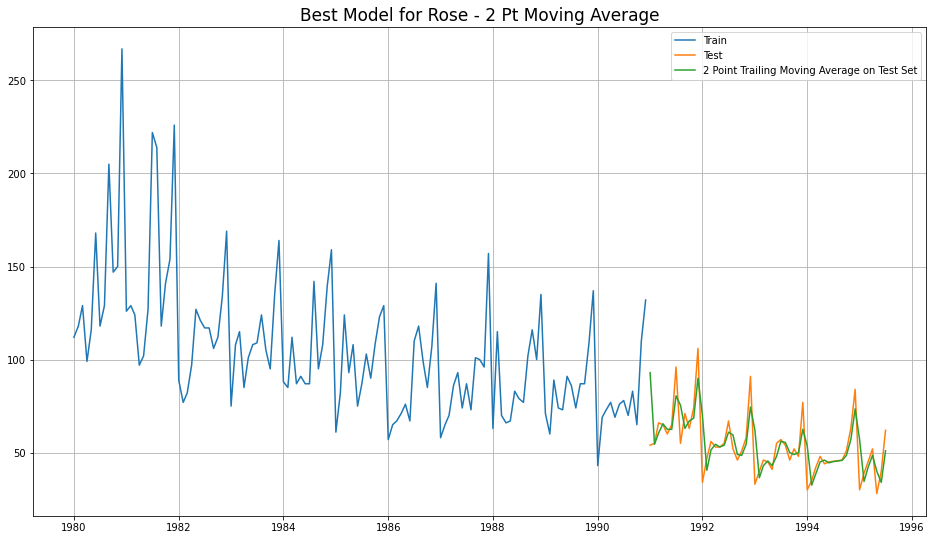

In [341]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

# FORECAST ON NEXT 12 MONTHS - ROSE 

## (Using 2 Pt Moving Average Model)

In [342]:
dfr1 = pd.read_csv('Rose.csv', parse_dates=True,index_col='YearMonth')
dfr1.head()
dfr1.tail()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

## Holt-Winters - ETS(A, A, M) - Best Model for Sparkling Till Now

### ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

### USING DAMPED TREND

In [344]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfs,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07567838101951672, 'smoothing_trend': 0.06487234494075612, 'smoothing_seasonal': 0.27374202895862765, 'damping_trend': 0.9900023194988556, 'initial_level': 2355.9520404583873, 'initial_trend': -18.322077710332564, 'initial_seasons': array([0.72404015, 0.69320166, 0.89738755, 0.81081503, 0.67812346,
       0.66502128, 0.89104602, 1.14047642, 0.93794592, 1.26324093,
       1.93208791, 2.5099101 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [345]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(steps=12)
TES_predict_am_damp_spark
prediction_1 = TES_predict_am_damp_spark
TES_predict_am_damp_spark.to_csv('spark_forecast_tes.csv')

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1995-08-01    1931.548659
1995-09-01    2352.035451
1995-10-01    3179.715287
1995-11-01    3918.609828
1995-12-01    5986.825950
1996-01-01    1357.492648
1996-02-01    1599.117790
1996-03-01    1830.306505
1996-04-01    1790.955356
1996-05-01    1641.907867
1996-06-01    1556.364789
1996-07-01    1965.888644
Freq: MS, dtype: float64

In [346]:
plt.rcParams["figure.figsize"] = [16,9]

In [347]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1253.817749  1931.548659  2609.279570
1995-09-01  1674.304540  2352.035451  3029.766361
1995-10-01  2501.984376  3179.715287  3857.446197
1995-11-01  3240.878917  3918.609828  4596.340739
1995-12-01  5309.095040  5986.825950  6664.556861

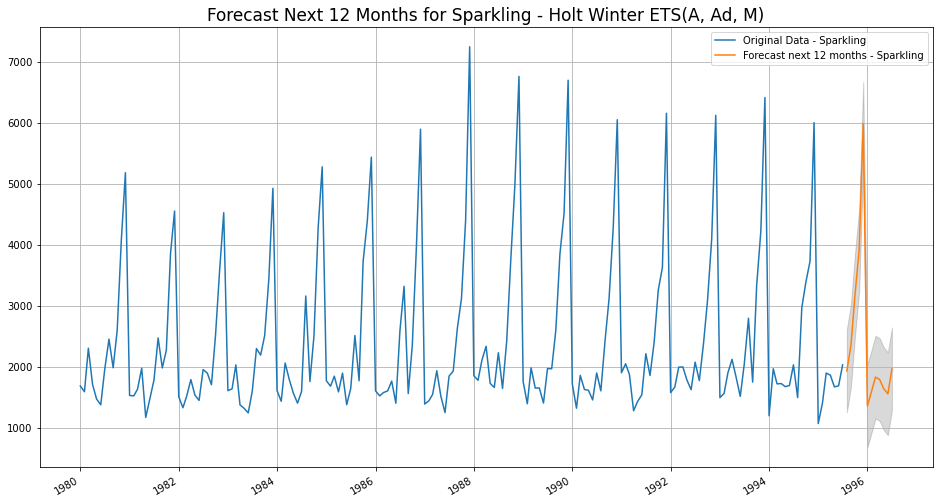

In [348]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(dfs['Sparkling'], label='Original Data - Sparkling')

ax =TES_predict_am_damp_spark.plot(label='Forecast next 12 months - Sparkling')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_forecast_tes.jpg', bbox_inches='tight');

## Building the second most optimum model on ROSE - TES ETS(A, A, A)

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [349]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfr,trend='add',seasonal='additive',initialization_method='estimated', damped_trend=False)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09623105607316472, 'smoothing_trend': 0.007090440762370349, 'smoothing_seasonal': 0.003451514779158787, 'damping_trend': nan, 'initial_level': 146.22170986283172, 'initial_trend': -0.5635821299809678, 'initial_seasons': array([-28.08544482, -17.1164866 ,  -8.96191709, -15.74055276,
       -11.83907447,  -5.7213814 ,   5.36590498,   5.29087572,
         2.66576186,   1.95435652,  17.09912238,  55.963095  ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [350]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES_am.forecast(steps=12)
TES_predict
prediction_1 = TES_predict
TES_predict.to_csv('rose_forecast_tes.csv')

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1995-08-01    49.772739
1995-09-01    46.634326
1995-10-01    45.406017
1995-11-01    60.028624
1995-12-01    98.360619
1996-01-01    13.816110
1996-02-01    24.258995
1996-03-01    31.889828
1996-04-01    24.606456
1996-05-01    27.978689
1996-06-01    33.570506
1996-07-01    44.099788
Freq: MS, dtype: float64

In [351]:
plt.rcParams["figure.figsize"] = [16,9]

In [352]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  14.903234   49.772739   84.642245
1995-09-01  11.764820   46.634326   81.503831
1995-10-01  10.536511   45.406017   80.275522
1995-11-01  25.159118   60.028624   94.898129
1995-12-01  63.491114   98.360619  133.230125

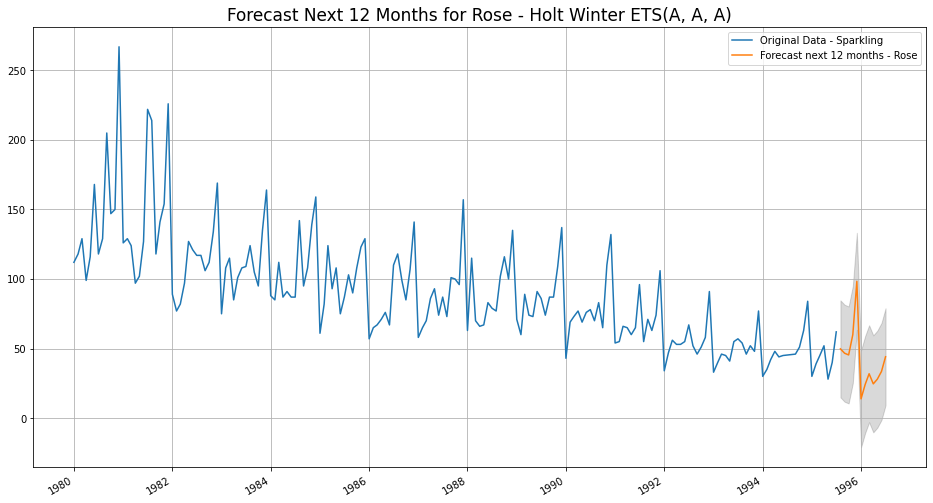

In [353]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(dfr['Rose'], label='Original Data - Sparkling')

ax =TES_predict.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Holt Winter ETS(A, A, A)', fontsize=17);

plt.savefig('rose_forecast_tes.jpg', bbox_inches='tight');